In [1]:
# Ignore this cell if not running on Google Colab
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/Colab Notebooks/data/upgrad/SEM1/EDA_CaseStudy

Mounted at /content/drive/
/content/drive/My Drive/Colab Notebooks/data/upgrad/SEM1/EDA_CaseStudy


In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from decimal import Decimal
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)
pd.options.display.float_format = '{:.4f}'.format

In [3]:
# The following function generates a couple of plots. 
# The first plot in the function shows the univariate distribution of "numerical_var" input and 
# the second plot in the function shows the bivariate relationship between "numerical_var" and "target_var" in the form of a set of box plots.

def plot_numerical(data,numerical_var,target_var):
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
  fig.tight_layout(pad=5.0)

  sns.distplot(data[numerical_var], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3}, ax=axes[0])

  sns.boxplot(x=target_var, y=numerical_var, data=data, ax=axes[1],showfliers = False)



# The following function generates a couple of plots. 
# The first plot in the function shows the univariate distribution of "numerical_var" input and 
# the second plot in the function shows the bivariate relationship between "numerical_var" and "target_var" in the form of bar plots.

def plot_numerical_avg(data,numerical_var,target_var):
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
  fig.tight_layout(pad=5.0)

  sns.distplot(data[numerical_var], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3}, ax=axes[0])
  data.groupby(target_var)[numerical_var].mean().sort_values().plot(kind='bar', rot=0, ax=axes[1])
 


# The following function generates a couple of plots. 
# The first plot in the function shows a segmented univariate distribution of the values of the variable "categorical_var" and
# the second plot in the function shows the segmented bivariate relationship between "categorical_var" and "target_var" in the form of a bar graph. 
# The Y-axis of the bar graph is the proportion of "1" in the target variable in a particular segment on the X-axis.

def plot_categorical(data,categorical_var,target_var,label_rotation=45,combine_less_freq_segments = False):
  data2 = data.copy()
  if combine_less_freq_segments:
    series = pd.value_counts(data2[categorical_var])
    mask = (series/series.sum() * 100).lt(3)
    data2[categorical_var] = np.where(data2[categorical_var].isin(series[mask].index),'All Others',data2[categorical_var])

    series = pd.value_counts(data2[categorical_var])
    mask = (series/series.sum() * 100).lt(1)
    data2[categorical_var] = np.where(data2[categorical_var].isin(series[mask].index),data2[categorical_var].mode()[0],data2[categorical_var])

  fig, axes = plt.subplots(nrows=1, ncols=2)

  data2.groupby(categorical_var)['SK_ID_CURR'].count().sort_values().plot(kind = "pie", figsize=(10,10), autopct='%1.f%%', ax=axes[0]).set_ylabel('')

  (data2.groupby(categorical_var)[target_var].mean()*100).sort_values().plot(kind='bar',figsize=(20,6), rot=label_rotation, ax=axes[1])
  axes[1].set(ylabel='Percent Risky')
  axes[1].yaxis.set_major_formatter(mtick.PercentFormatter())

  for p in axes[1].patches:
    axes[1].annotate("%.1f%%" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')



# The following function generates a couple of plots. 
# The first plot in the function shows a segmented univariate distribution of the values of the variable "categorical_var" and
# the second plot in the function shows the distribution of counts of the segments of "categorical_var" and "target_var" in the form count plot. 

def plot_categorical_count(data,categorical_var,target_var,combine_less_freq_segments = False):
  data2 = data.copy()
  if combine_less_freq_segments:
    series = pd.value_counts(data2[categorical_var])
    mask = (series/series.sum() * 100).lt(3)
    data2[categorical_var] = np.where(data2[categorical_var].isin(series[mask].index),'All Others',data2[categorical_var])

    series = pd.value_counts(data2[categorical_var])
    mask = (series/series.sum() * 100).lt(1)
    data2[categorical_var] = np.where(data2[categorical_var].isin(series[mask].index),data2[categorical_var].mode()[0],data2[categorical_var])

  fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20,10))
  fig.tight_layout(pad=10.0)

  data2.groupby(categorical_var)['SK_ID_CURR'].count().sort_values().plot(kind = "pie", autopct='%1.f%%', ax=axes[0]).set_ylabel('')

  sns.countplot(x= categorical_var, hue = target_var, data = data2, ax=axes[1])
  plt.xticks(rotation = 45)

In [4]:
# Import the datasets in to Pandas
curr_app = pd.read_csv("application_data.csv")
previous_app = pd.read_csv("previous_application.csv")

# Data Exploration and Cleanup

In [5]:
curr_app.shape

(307511, 122)

In [6]:
curr_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
curr_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0000,406597.5000,24700.5000,351000.0000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.0188,-9461,-637,-3648.0000,-2120,nan,1,1,0,1,1,0,Laborers,1.0000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.0830,0.2629,0.1394,0.0247,0.0369,0.9722,0.6192,0.0143,0.0000,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0000,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.0000,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0000,2.0000,2.0000,2.0000,-1134.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
1,100003,0,Cash loans,F,N,N,0,270000.0000,1293502.5000,35698.5000,1129500.0000,Family,State servant,Higher education,Married,House / apartment,0.0035,-16765,-1188,-1186.0000,-291,nan,1,1,0,1,1,0,Core staff,2.0000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.3113,0.6222,nan,0.0959,0.0529,0.9851,0.7960,0.0605,0.0800,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0000,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.0800,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0000,0.0000,1.0000,0.0000,-828.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0000,135000.0000,6750.0000,135000.0000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.0100,-19046,-225,-4260.0000,-2531,26.0000,1,1,1,1,1,0,Laborers,1.0000,2,2,MONDAY,9,0,0,0,0,0,0,Government,nan,0.5559,0.

In [8]:
curr_app.describe(include = "all")

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.0000,307511.0000,307511,307511,307511,307511,307511.0000,307511.0000,307511.0000,307499.0000,307233.0000,306219,307511,307511,307511,307511,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,104582.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,211120,307509.0000,307511.0000,307511.0000,307511,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511,134133.0000,306851.0000,246546.0000,151450.0000,127568.0000,157504.0000,103023.0000,92646.0000,143620.0000,152683.0000,154491.0000,98869.0000,124921.0000,97312.0000,153161.0000,93997.0000,137829.0000,151450.0000,127568.0000,157504.0000,103023.0000,92646.0000,143620.0000,152683.0000,154491.0000,98869.0000,124921.0000,97312.0000,153161.0000,93997.0000,137829.0000,151450.0000,127568.0000,157504.0000,103023.0000,92646.0000,143620.0000,152683.0000,154491.0000,98869.0000,124921.0000,97312.0000,153161.0000,93997.0000,137829.0000,97216,153214,159080.0000,151170,161756,306490.0000,306490.0000,306490.0000,306490.0000,307510.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,265992.0000,265992.0000,265992.0000,265992.0000,265992.0000,265992.0000
unique,nan,nan,2,3,2,2,nan,nan,nan,nan,nan,7,8,5,6,6,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,18,nan,nan,nan,7,nan,nan,nan,nan,nan,nan,nan,58,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,4,3,nan,7,2,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,

Let's clean up a few columns and then look at the missings to be dropped

In [9]:
#Replacing "N" with 0 and "Y" with 1 binary columns.

curr_app['FLAG_MOBIL'] = curr_app.FLAG_MOBIL.map({0: 'N', 1: 'Y'})
curr_app['FLAG_EMP_PHONE'] = curr_app.FLAG_EMP_PHONE.map({0: 'N', 1: 'Y'})
curr_app['FLAG_WORK_PHONE'] = curr_app.FLAG_WORK_PHONE.map({0: 'N', 1: 'Y'})
curr_app['FLAG_CONT_MOBILE'] = curr_app.FLAG_CONT_MOBILE.map({0: 'N', 1: 'Y'})
curr_app['FLAG_PHONE'] = curr_app.FLAG_PHONE.map({0: 'N', 1: 'Y'})
curr_app['FLAG_EMAIL'] = curr_app.FLAG_EMAIL.map({0: 'N', 1: 'Y'})
curr_app['REG_CITY_NOT_WORK_CITY'] = curr_app.REG_CITY_NOT_WORK_CITY.map({0: 'N', 1: 'Y'})
curr_app['REG_CITY_NOT_LIVE_CITY'] = curr_app.REG_CITY_NOT_LIVE_CITY.map({0: 'N', 1: 'Y'})
curr_app['REG_REGION_NOT_WORK_REGION'] = curr_app.REG_REGION_NOT_WORK_REGION.map({0: 'N', 1: 'Y'})
curr_app['REG_REGION_NOT_LIVE_REGION'] = curr_app.REG_REGION_NOT_LIVE_REGION.map({0: 'N', 1: 'Y'})
curr_app['LIVE_REGION_NOT_WORK_REGION'] = curr_app.LIVE_REGION_NOT_WORK_REGION.map({0: 'N', 1: 'Y'})
curr_app['LIVE_CITY_NOT_WORK_CITY'] = curr_app.LIVE_CITY_NOT_WORK_CITY.map({0: 'N', 1: 'Y'})

#Replacing ratings 1 with "High", 2 with "Medium", 3 with "Low"
curr_app['REGION_RATING_CLIENT_W_CITY'] = curr_app.REGION_RATING_CLIENT_W_CITY.map({1: 'High', 2: 'Medium', 3: 'Low'})
curr_app['REGION_RATING_CLIENT'] = curr_app.REGION_RATING_CLIENT.map({1: 'High', 2: 'Medium', 3: 'Low'})

#Total the number of documents 
curr_app['NUM_DOCS'] = curr_app[['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']].sum(axis=1)

#Converting days columns to years columns in curr_app dataframe by dividing by (-365), we do this because YEARS are easy to understand than DAYS, e.g. 1000 days is just under 3 years.
curr_app[['YEARS_BIRTH', 'YEARS_EMPLOYED', 'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH', 'YEARS_LAST_PHONE_CHANGE']] = curr_app[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']]/(-365)

#The days columns mostly had negative values except for a few positive values. When we divided by -365 these positive values got changed to negative with absurd -1000 year values.(orginal data has "365243")
#Replacing these negative values with nan.
cols = ['YEARS_BIRTH', 'YEARS_EMPLOYED', 'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH', 'YEARS_LAST_PHONE_CHANGE']
for col in cols:
  curr_app.loc[curr_app[col]<0,col] = np.nan

# Replacing null values with "Unknown" in "OCCUPATION_TYPE".
curr_app.OCCUPATION_TYPE = curr_app.OCCUPATION_TYPE.fillna("Unknown")

#There are 66% null values in OWN_CAR_AGE column which means that these people do not own a car. 
#Hence binning OWN_CAR_AGE column in the following categories.
curr_app.loc[curr_app.OWN_CAR_AGE.isnull(),"OWN_CAR_AGE_BIN"] = "Does not own a car"
curr_app.loc[curr_app.OWN_CAR_AGE.between(0,5) ,"OWN_CAR_AGE_BIN"] = "0 to 5 years"
curr_app.loc[curr_app.OWN_CAR_AGE.between(6,10),"OWN_CAR_AGE_BIN"] = "6 to 10 years"
curr_app.loc[curr_app.OWN_CAR_AGE.between(11,15),"OWN_CAR_AGE_BIN"] = "11 to 15 years"
curr_app.loc[curr_app.OWN_CAR_AGE.between(16,20),"OWN_CAR_AGE_BIN"] = "16 to 20 years"
curr_app.loc[curr_app.OWN_CAR_AGE > 20,"OWN_CAR_AGE_BIN"] = "21 years and above"

# Binning the variable in four equal quantiles.
curr_app.loc[curr_app.EXT_SOURCE_1.isnull(),"EXT_SOURCE_1_BIN"] = "Missing"
curr_app.loc[curr_app.EXT_SOURCE_1.between(0,0.33) ,"EXT_SOURCE_1_BIN"] = "First Quartile"
curr_app.loc[curr_app.EXT_SOURCE_1.between(0.33001,0.5),"EXT_SOURCE_1_BIN"] = "Second Quartile"
curr_app.loc[curr_app.EXT_SOURCE_1.between(0.50001,0.67),"EXT_SOURCE_1_BIN"] = "Third Quartile"
curr_app.loc[curr_app.EXT_SOURCE_1 > 0.67,"EXT_SOURCE_1_BIN"] = "Fourth Quartile"

#Binning AMT_INCOME_TOTAL in segments
curr_app.loc[curr_app.AMT_INCOME_TOTAL.between(0,100000) ,"AMT_INCOME_TOTAL_BIN"] = "Low"
curr_app.loc[curr_app.AMT_INCOME_TOTAL.between(100001,200000),"AMT_INCOME_TOTAL_BIN"] = "Medium"
curr_app.loc[curr_app.AMT_INCOME_TOTAL.between(200001,300000),"AMT_INCOME_TOTAL_BIN"] = "High"
curr_app.loc[curr_app.AMT_INCOME_TOTAL > 300000,"AMT_INCOME_TOTAL_BIN"] = "Very High"

In [10]:
# Null percentages in each column

nulls = round(curr_app.isnull().mean()*100,2)
nulls[nulls>0].sort_values(ascending = False)

COMMONAREA_MEDI                69.8700
COMMONAREA_MODE                69.8700
COMMONAREA_AVG                 69.8700
NONLIVINGAPARTMENTS_AVG        69.4300
NONLIVINGAPARTMENTS_MODE       69.4300
NONLIVINGAPARTMENTS_MEDI       69.4300
FONDKAPREMONT_MODE             68.3900
LIVINGAPARTMENTS_AVG           68.3500
LIVINGAPARTMENTS_MODE          68.3500
LIVINGAPARTMENTS_MEDI          68.3500
FLOORSMIN_MODE                 67.8500
FLOORSMIN_MEDI                 67.8500
FLOORSMIN_AVG                  67.8500
YEARS_BUILD_AVG                66.5000
YEARS_BUILD_MEDI               66.5000
YEARS_BUILD_MODE               66.5000
OWN_CAR_AGE                    65.9900
LANDAREA_MODE                  59.3800
LANDAREA_AVG                   59.3800
LANDAREA_MEDI                  59.3800
BASEMENTAREA_AVG               58.5200
BASEMENTAREA_MEDI              58.5200
BASEMENTAREA_MODE              58.5200
EXT_SOURCE_1                   56.3800
NONLIVINGAREA_MEDI             55.1800
NONLIVINGAREA_AVG        

In [11]:
# Dropping columns with suffix "AVG","MODE" and "MEDI" as it has 47% or more null values.
# Also dropping the FLAG variables as we've converted them to 0/1 and dropping the DAYS variables as they have been converted to years.
curr_app = curr_app.drop(['EXT_SOURCE_1', 'APARTMENTS_AVG',
       'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG',
       'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE',
       'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI',
       'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI',
       'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
       'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE',
       'OWN_CAR_AGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'],axis=1)

In [12]:
# Boxplots for numerical columns with outliers.
def box_plot(data,lst):
  fig, axes = plt.subplots(nrows=2, ncols=3)
  fig.tight_layout()
  data[lst[0]].dropna().plot(kind = "box", ax = axes[0,0], figsize = (20,10))
  data[lst[1]].dropna().plot(kind = "box", ax = axes[0,1],figsize = (20,10))
  data[lst[2]].dropna().plot(kind = "box", ax = axes[0,2], figsize = (20,10))
  data[lst[3]].dropna().plot(kind = "box", ax = axes[1,0], figsize = (20,10))
  data[lst[4]].dropna().plot(kind = "box", ax = axes[1,1],figsize = (20,10))
  data[lst[5]].dropna().plot(kind = "box", ax = axes[1,2], figsize = (20,10))

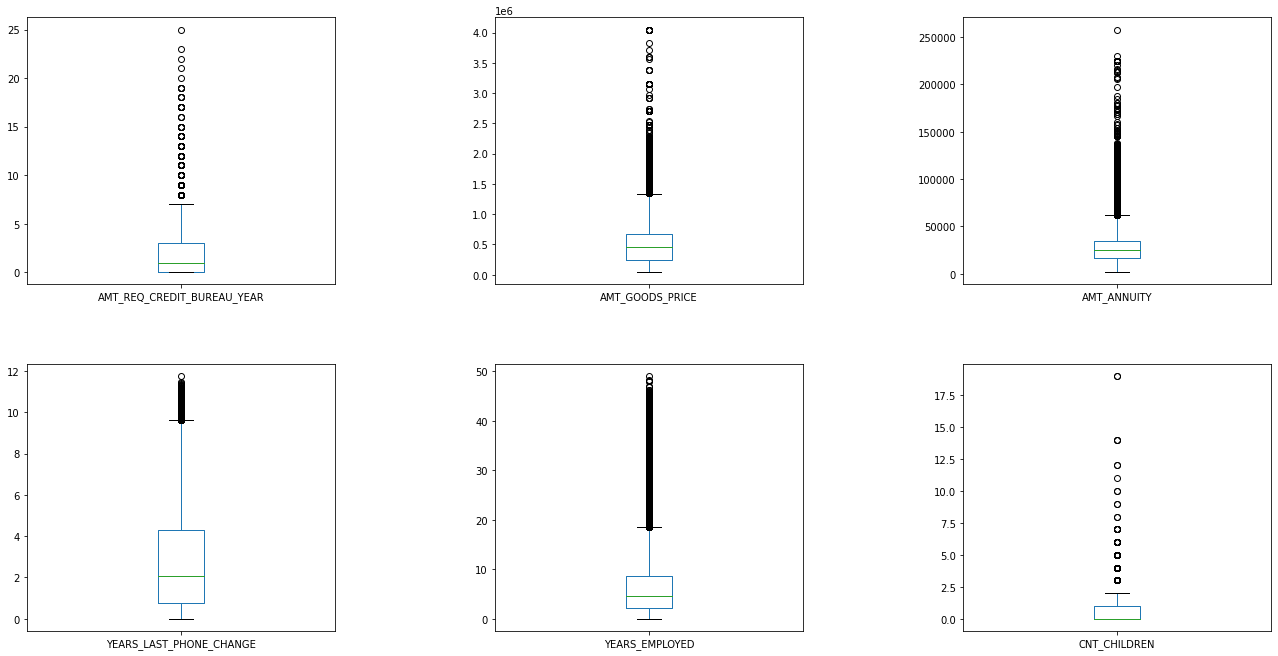

In [13]:
box_plot(curr_app,['AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_GOODS_PRICE', 'AMT_ANNUITY','YEARS_LAST_PHONE_CHANGE', 'YEARS_EMPLOYED', 'CNT_CHILDREN'])

In 'AMT_REQ_CREDIT_BUREAU_YEAR' the upper whisker is somewhere around 7, the values above the upper whisker are the outliers.

In 'AMT_GOODS_PRICE' the upper whisker is slightly below 1.5, the values above the upper whisker are the outliers.

In 'AMT_ANNUITY' the upper whisker is slightly above 50000, the values above the upper whisker are the outliers.

In 'YEARS_LAST_PHONE_CHANGE' the upper whisker is slightly below 10, the values above the upper whisker are the outliers.

In 'YEARS_EMPLOYED' the upper whisker is slightly below 20, the values above the upper whisker are the outliers.

In 'CNT_CHILDREN' the upper whisker is slightly below 2.5, the values above the upper whisker are the outliers.


In [14]:
#Lets look at a few variables with null values.
curr_app[['AMT_GOODS_PRICE','YEARS_LAST_PHONE_CHANGE', 'EXT_SOURCE_2', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'NAME_TYPE_SUITE']].isnull().mean()

AMT_GOODS_PRICE              0.0009
YEARS_LAST_PHONE_CHANGE      0.0000
EXT_SOURCE_2                 0.0021
AMT_REQ_CREDIT_BUREAU_YEAR   0.1350
NAME_TYPE_SUITE              0.0042
dtype: float64

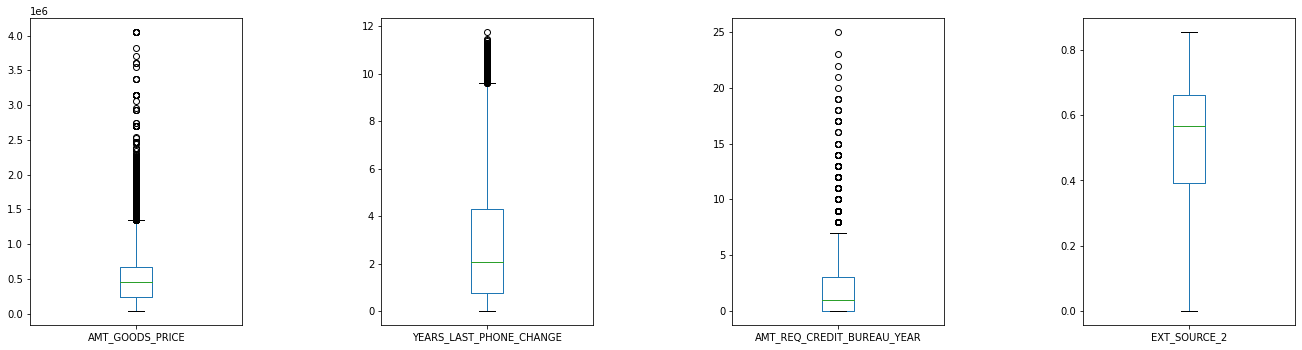

In [15]:
# Box plots for the variables from above.
fig, axes = plt.subplots(nrows=1, ncols=4)
fig.tight_layout()
curr_app['AMT_GOODS_PRICE'].dropna().plot(kind = "box", ax = axes[0], figsize = (20,5))
curr_app['YEARS_LAST_PHONE_CHANGE'].dropna().plot(kind = "box", ax = axes[1],figsize = (20,5))
curr_app['AMT_REQ_CREDIT_BUREAU_YEAR'].dropna().plot(kind = "box", ax = axes[2], figsize = (20,5))
curr_app['EXT_SOURCE_2'].dropna().plot(kind = "box", ax = axes[3], figsize = (20,5))

"AMT_GOODS_PRICE", "YEARS_LAST_PHONE_CHANGE" and"AMT_REQ_CREDIT_BUREAU_YEAR" have outliers and their null values should be imputed by their respective **medians**.

"EXT_SOURCE_2" have no outliers and their null values can be replaced by it's **mean** or it's **median**.             
   
"NAME_TYPE_SUITE" is a categorical variable, hence it's null values can be replaced by it's **mode** value.

The below table shows the mean and the median values of the variables selected from above. We see that for variables with outliers there is a significant difference between the mean and the median whereas for the variables without outliers this difference is relatively small.

In [16]:
curr_app[['AMT_GOODS_PRICE','YEARS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'EXT_SOURCE_2', 'NAME_TYPE_SUITE']].describe([0.5],include='all')

,AMT_GOODS_PRICE,YEARS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_2,NAME_TYPE_SUITE
count,307233.0000,307510.0000,265992.0000,306851.0000,306219
unique,nan,nan,nan,nan,7
top,nan,nan,nan,nan,Unaccompanied
freq,nan,nan,nan,nan,248526
mean,538396.2074,2.6380,1.9000,0.5144,NaN
std,369446.4605,2.2652,1.8693,0.1911,NaN
min,40500.0000,-0.0000,0.0000,0.0000,NaN
50%,450000.0000,2.0740,1.0000,0.5660,NaN
max,4050000.0000,11.7589,25.0000,0.8550,NaN


In [17]:
curr_app.to_csv("curr_app.csv", index = False)

## Target Imbalance

[Text(0, 0.5, ''), Text(0.5, 1.0, 'Target')]

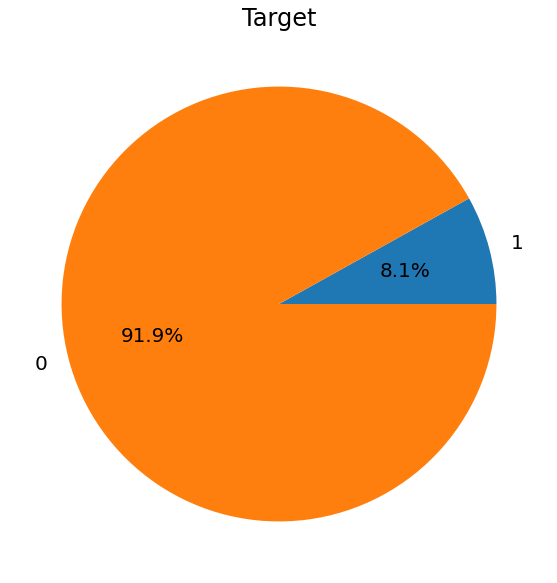

In [81]:
# Checking for percentages of 0 and 1 in the "TARGET" variable

plt.rcParams.update({'font.size': 20})
ax = curr_app.groupby("TARGET")['SK_ID_CURR'].count().sort_values().plot(kind = "pie", figsize=(10,10), autopct='%1.1f%%')
ax.set(title = "Target", ylabel = "")

The above pie chart shows the imbalance between the values of the target variable. The data comprises of 8.1% "risky" applicants (1 - client with payment difficulties: they had late payments more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)

In [19]:
# Splitting the data set into two data frames. 
#target0 is a data frame where TARGET is 0.
#target1 is a data frame where TARGET is 1.

target0 = curr_app[curr_app.TARGET==0]
target1 = curr_app[curr_app.TARGET==1]

In [20]:
# The following code generates a table containing pairs of highly corelated variables (Top 10) in "target0" dataframe.
corr0 = abs(target0.drop(['SK_ID_CURR','TARGET'], axis=1).corr()).stack().loc[lambda x: x.index.get_level_values(0) < x.index.get_level_values(1)]
corr0 = corr0.to_frame().sort_values(by=0,ascending=False)
corr0 = corr0.reset_index()[:10]
corr0.columns = ['Var1','Var2','Correlation']
corr0

,Var1,Var2,Correlation
0,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,0.9985
1,AMT_CREDIT,AMT_GOODS_PRICE,0.9873
2,CNT_CHILDREN,CNT_FAM_MEMBERS,0.8786
3,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,0.8593
4,AMT_ANNUITY,AMT_GOODS_PRICE,0.7767
5,AMT_ANNUITY,AMT_CREDIT,0.7713
6,AMT_ANNUITY,AMT_INCOME_TOTAL,0.4190
7,YEARS_BIRTH,YEARS_EMPLOYED,0.3527
8,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.3495
9,AMT_CREDIT,AMT_INCOME_TOTAL,0.3428


In [21]:
# The following code generates a table containing pairs of highly corelated variables (Top 10) in "target1" dataframe.

corr1 = abs(target1.drop(['SK_ID_CURR','TARGET'], axis=1).corr()).stack().loc[lambda x: x.index.get_level_values(0) < x.index.get_level_values(1)]
corr1 = corr1.to_frame().sort_values(by=0,ascending=False)
corr1 = corr1.reset_index()[:10]
corr1.columns = ['Var1','Var2','Correlation']
corr1

,Var1,Var2,Correlation
0,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,0.9983
1,AMT_CREDIT,AMT_GOODS_PRICE,0.9831
2,CNT_CHILDREN,CNT_FAM_MEMBERS,0.8855
3,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,0.8690
4,AMT_ANNUITY,AMT_GOODS_PRICE,0.7527
5,AMT_ANNUITY,AMT_CREDIT,0.7522
6,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,0.3372
7,DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.3338
8,YEARS_BIRTH,YEARS_EMPLOYED,0.3070
9,YEARS_BIRTH,YEARS_REGISTRATION,0.2891


Some variables from the above tables make direct sense, e.g. count of children and count of family members is highly correlated and that is expected. Same applies for amount credit and amount annuity as EMI values depend on the approved credit amounts.

# Univariate and Bivariate Analyses

The riskiest segment under "EXT_SOURCE_1_BIN" is "First Quartile" whereas the  least risky is "Fourth Quartile". 

This is a binned variable (into four equal quartiles and one bin for "missings") from "EXT_SOURCE_1" continuous variable.

The first quartile ranges from 0 - 0.33 and the fourth quartile ranges from 0.67 - 1.


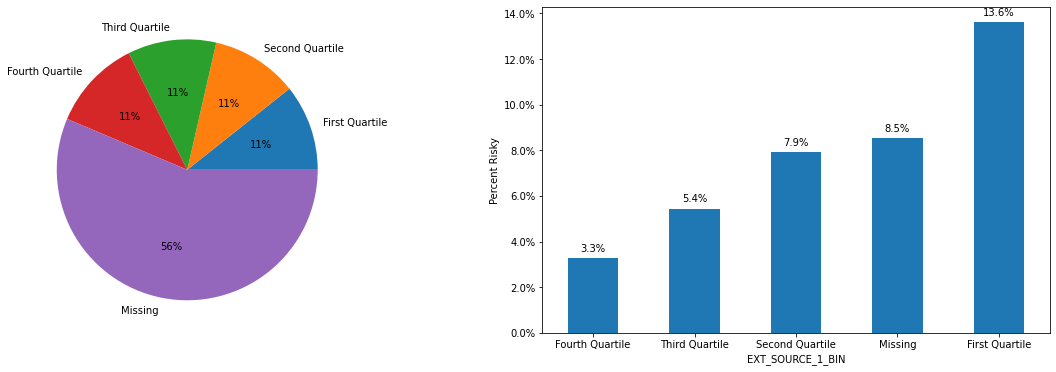

In [22]:
plot_categorical(curr_app,"EXT_SOURCE_1_BIN","TARGET",label_rotation=0,combine_less_freq_segments = False)

The riskiest segment under "REGION_RATING_CLIENT_W_CITY" (Rating of the client's city) is "Low" (3) whereas the least risky is "High" (1).

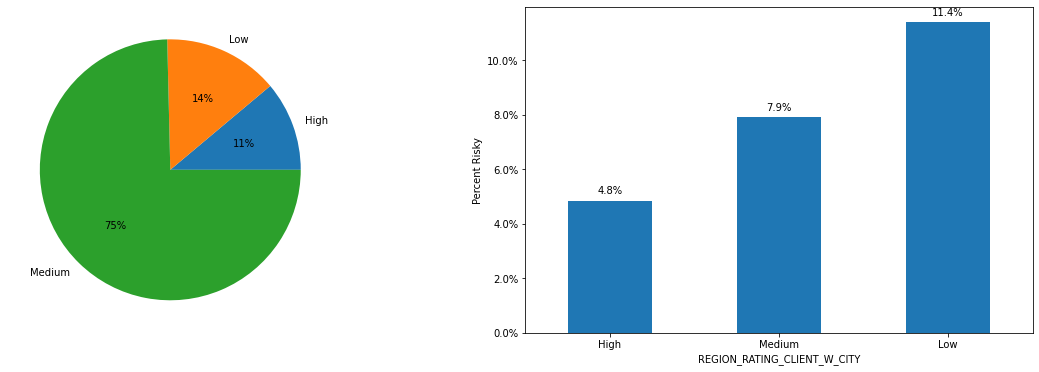

In [23]:
plot_categorical(curr_app,"REGION_RATING_CLIENT_W_CITY","TARGET",label_rotation=0,combine_less_freq_segments = False)

The riskiest segment under "REGION_RATING_CLIENT" (Rating of the client's region) is "Low" (3) whereas the least risky is "High" (1).


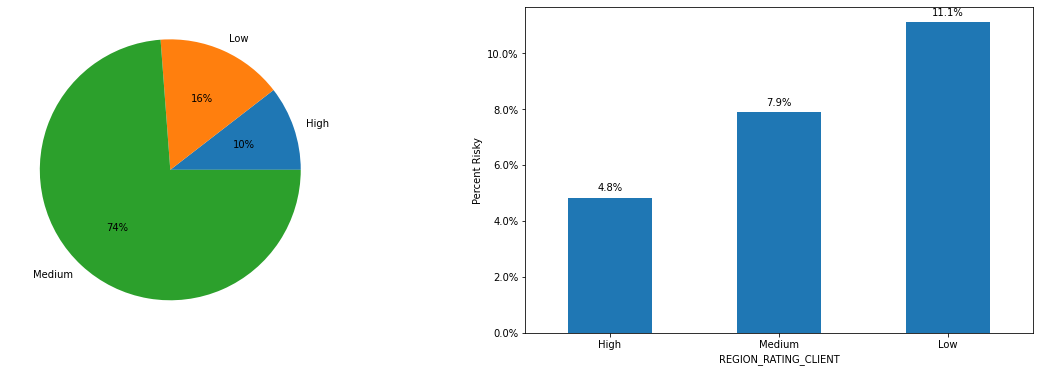

In [24]:
plot_categorical(curr_app,"REGION_RATING_CLIENT","TARGET",label_rotation=0,combine_less_freq_segments = False)

The riskiest segment under "OCCUPATION_TYPE" (Type of occupation) is "Drivers" whereas the least risky is "Accountants"

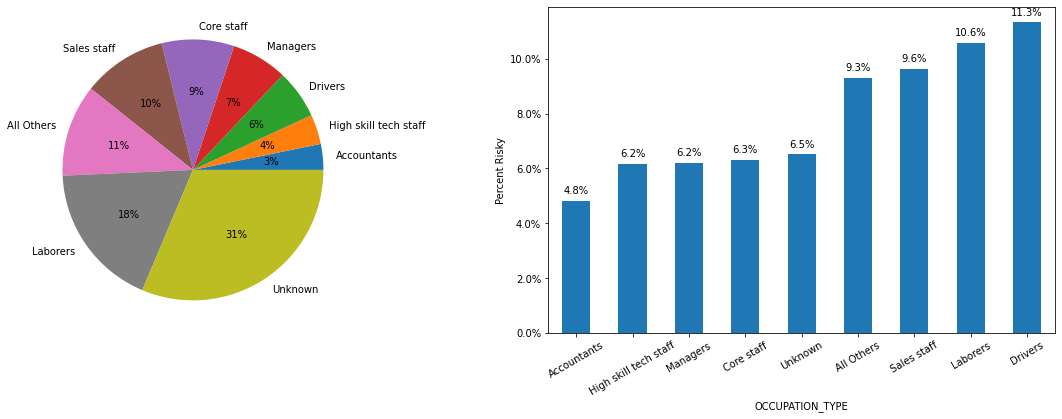

In [25]:
plot_categorical(curr_app,"OCCUPATION_TYPE","TARGET",label_rotation=30,combine_less_freq_segments = True)

The riskiest segment under "NAME_EDUCATION_TYPE" (Client's education type)  is anything other than "Higher Education" whereas the least risky is "Higher Education".

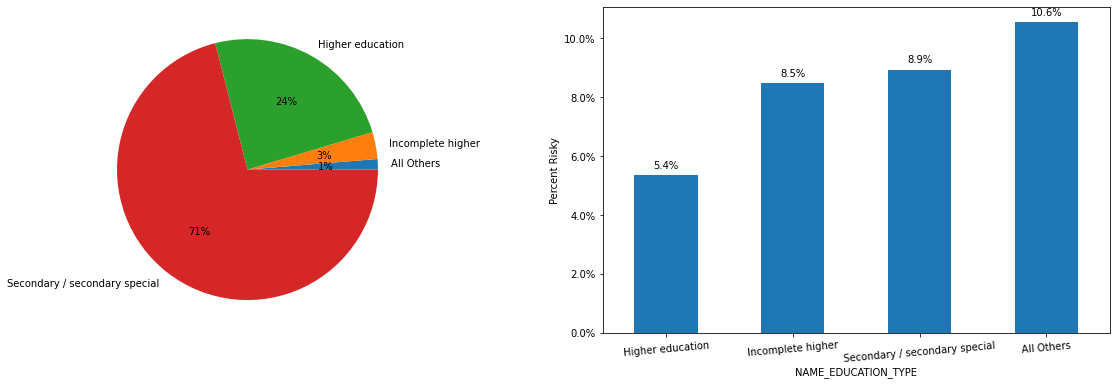

In [26]:
plot_categorical(curr_app,"NAME_EDUCATION_TYPE","TARGET",label_rotation=5,combine_less_freq_segments = True)

The riskiest segment under "ORGANIZATION_TYPE" (Type of organization where the client works) is "Self-employed" whereas the least risky is when the "ORGANIZATION_TYPE" is unavailable.

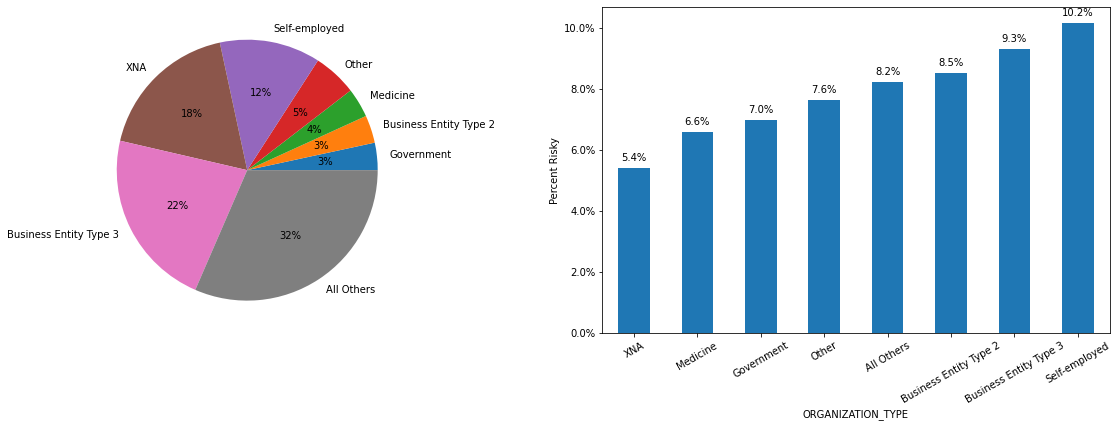

In [27]:
plot_categorical(curr_app,"ORGANIZATION_TYPE","TARGET",label_rotation=30,combine_less_freq_segments = True)

In "REG_CITY_NOT_LIVE_CITY" it is riskier when the segment is "Y" (client's permanent address does not match contact address) and less risky when the segment is "N" (client's permanent address matches contact address)

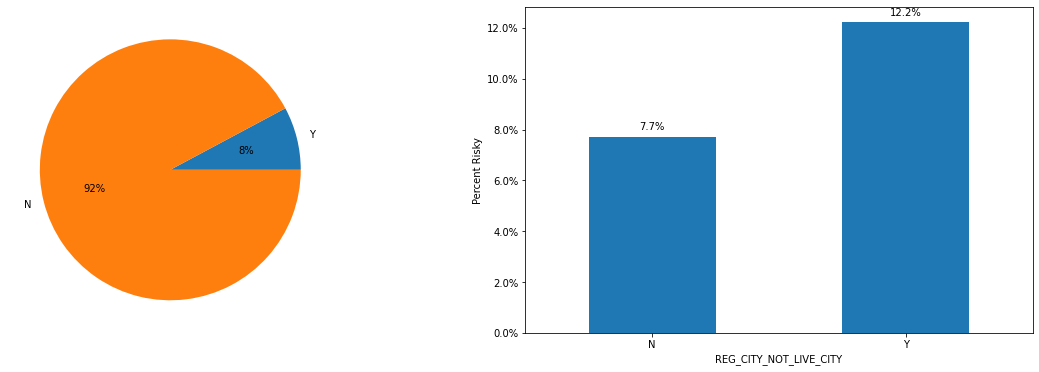

In [28]:
plot_categorical(curr_app,"REG_CITY_NOT_LIVE_CITY","TARGET",label_rotation=0,combine_less_freq_segments = False)

The riskiest segment under "Name_IncomeType" (Client's income type)  is "Working" whereas the least risky is "Pensioner".

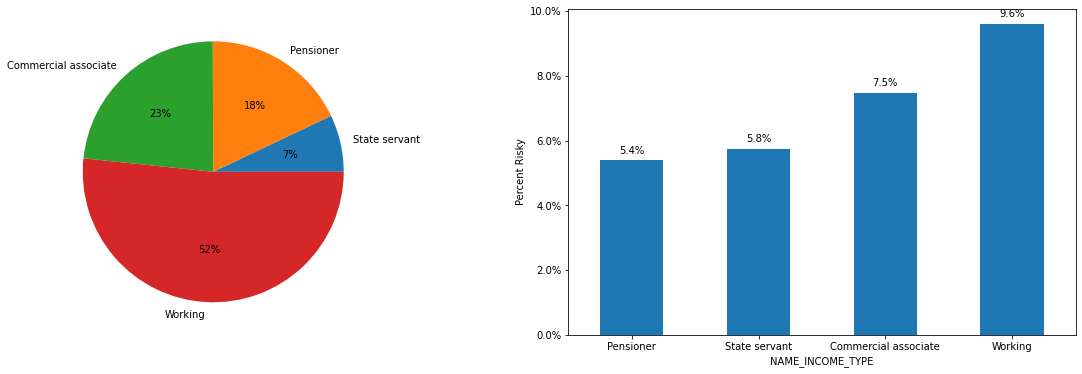

In [29]:
plot_categorical(curr_app,"NAME_INCOME_TYPE","TARGET",label_rotation=0,combine_less_freq_segments = True)

The riskiest segment under "Family Status" is "Civil Marriage" whereas the least risky is "Widow".

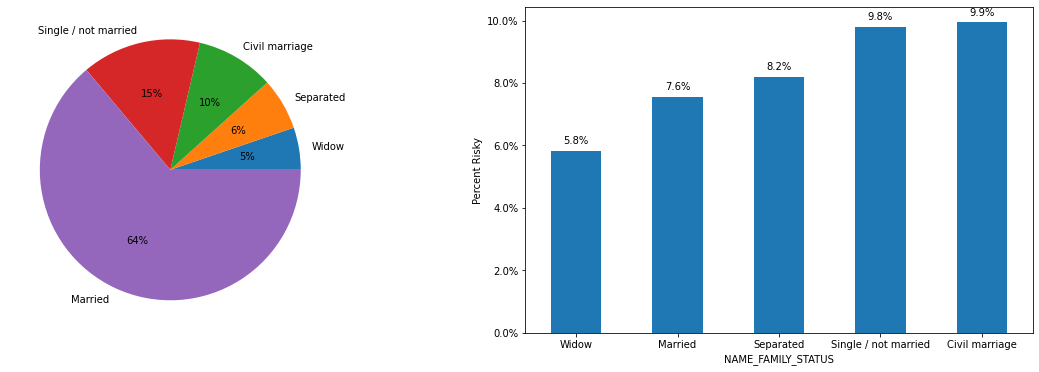

In [30]:
plot_categorical(curr_app,"NAME_FAMILY_STATUS","TARGET",label_rotation=0,combine_less_freq_segments = True)

The riskiest segment under "NAME_HOUSING_TYPE" are the people who live with their parents as they are not financially independent yet whereas the least risky are people who live in a house/apartment.

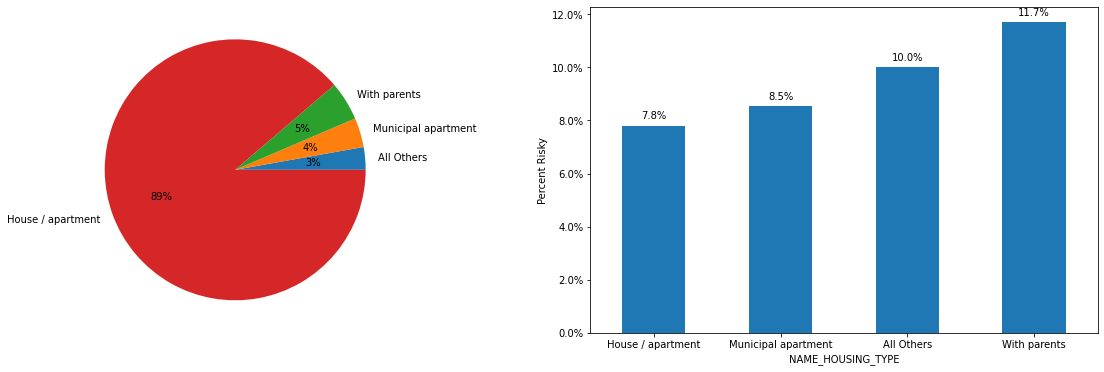

In [31]:
plot_categorical(curr_app,"NAME_HOUSING_TYPE","TARGET",label_rotation=0,combine_less_freq_segments = True)

The riskiest segment under "OWN_CAR_AGE_BIN" is "21 years and above"(car age) whereas the least risky is "0 to 5 years"(car age).

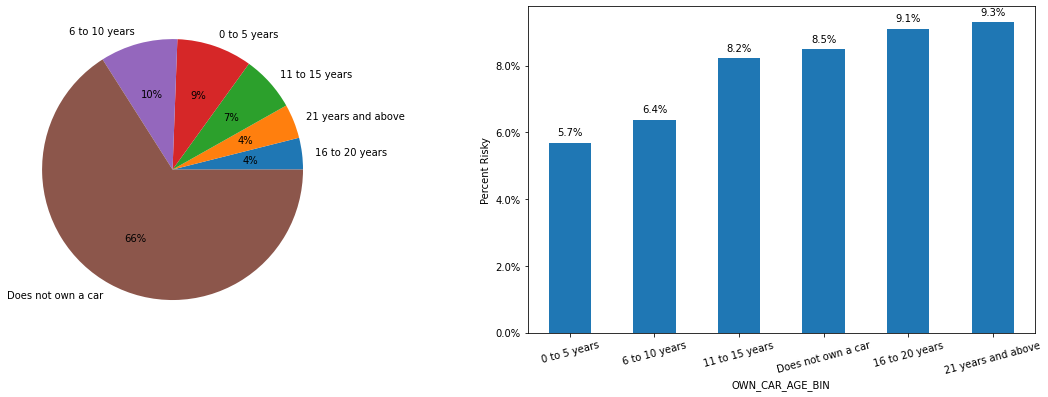

In [32]:
plot_categorical(curr_app,"OWN_CAR_AGE_BIN","TARGET",label_rotation=15,combine_less_freq_segments = False)

In "REG_CITY_NOT_WORK_CITY" it is riskier when the segment is "Y" (client's permanent address does not match work address) and less risky when the segment is "N" (client's permanent address matches work address)

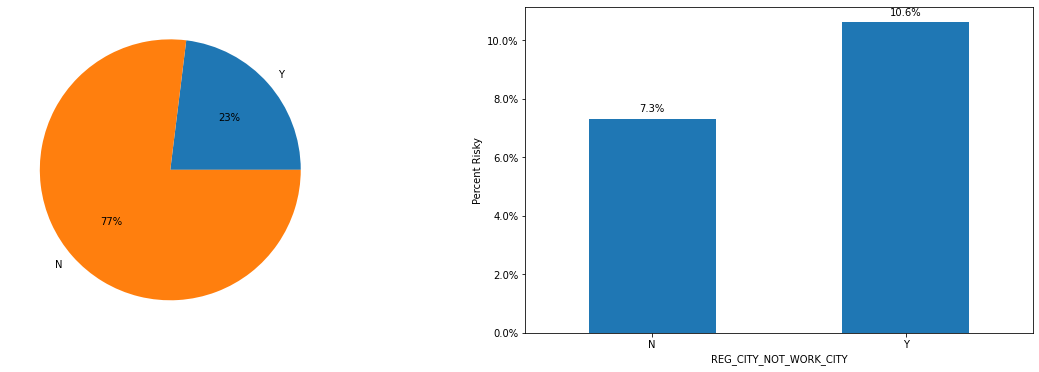

In [33]:
plot_categorical(curr_app,"REG_CITY_NOT_WORK_CITY","TARGET",label_rotation=0,combine_less_freq_segments = False)

In "FLAG_EMP_PHONE" it is riskier when the segment is "Y" (client provided work phone) and less risky when the segment is "N" (client did not provide work phone)

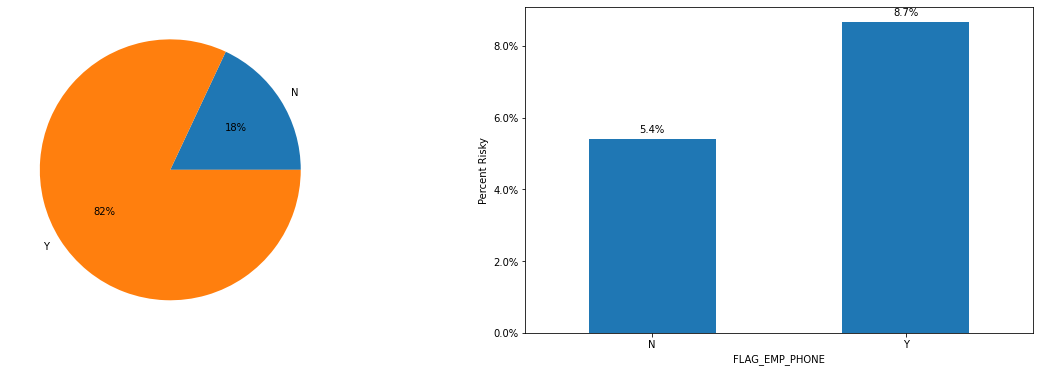

In [34]:
plot_categorical(curr_app,"FLAG_EMP_PHONE","TARGET",label_rotation=0,combine_less_freq_segments = False)

"CODE_GENDER" variable shows that males are riskier than females.

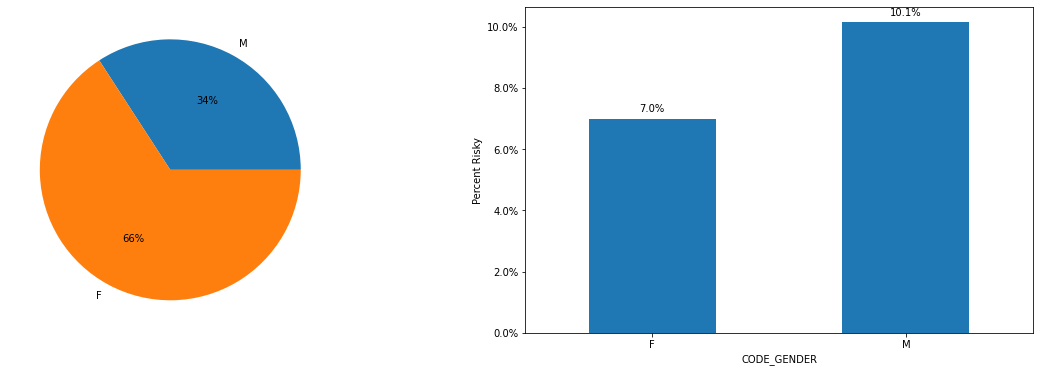

In [35]:
plot_categorical(curr_app,"CODE_GENDER","TARGET",label_rotation=0,combine_less_freq_segments = True)

The plot on the left shows the distribution of "EXT_SOURCE_2".
From the box plots on the right we see that non risky customers have higher values of "EXT_SOURCE_2" compared to risky customers.

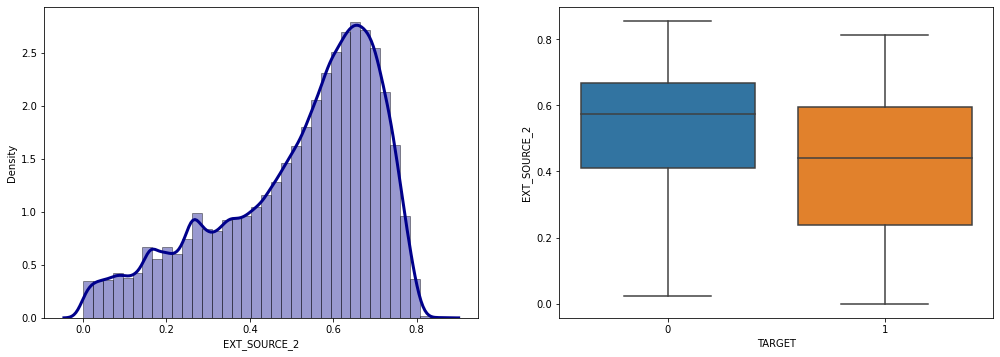

In [36]:
plot_numerical(curr_app,'EXT_SOURCE_2','TARGET')

The plot on the left shows the distribution of "EXT_SOURCE_3".
From the box plots on the right we see that non risky customers have higher values of "EXT_SOURCE_2" compared to risky customers.

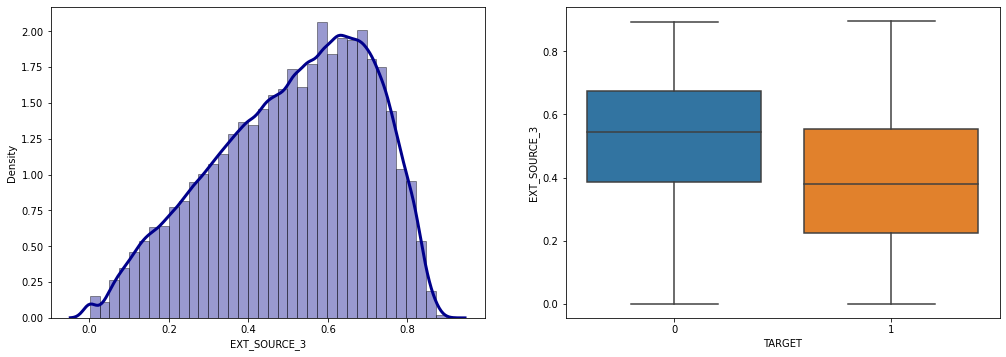

In [37]:
plot_numerical(curr_app,'EXT_SOURCE_3','TARGET')

The plot on the left shows the distribution of "YEARS_BIRTH".
From the box plots on the right we see that non risky customers have higher values of "YEARS_BIRTH" (age) compared to risky customers.

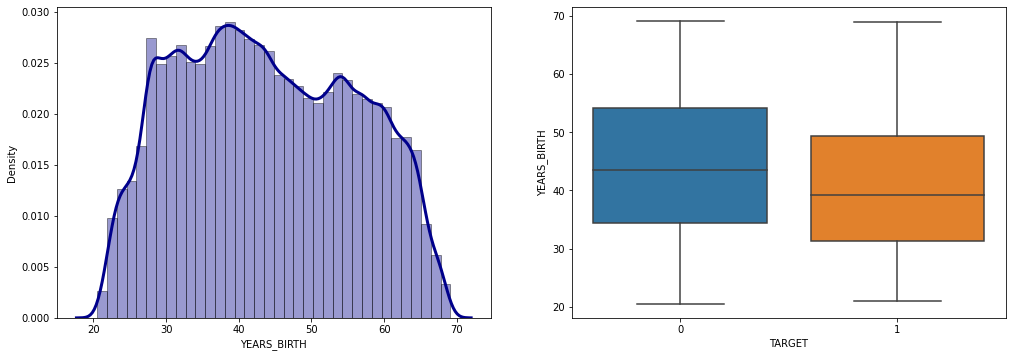

In [38]:
plot_numerical(curr_app,'YEARS_BIRTH','TARGET')

The plot on the left shows the distribution of "YEARS_ID_PUBLISH".
From the box plots on the right we see that risky customers have changed their identity document which was used for loan application in the recent years.

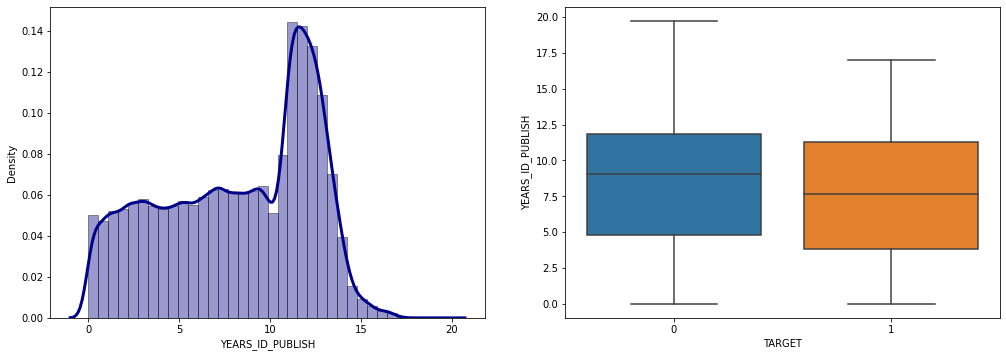

In [39]:
plot_numerical(curr_app,'YEARS_ID_PUBLISH','TARGET')

The plot on the left shows the distribution of "YEARS_LAST_PHONE_CHANGE".
From the box plots on the right we see that risky customers have changed their phone numbers in the recent years.

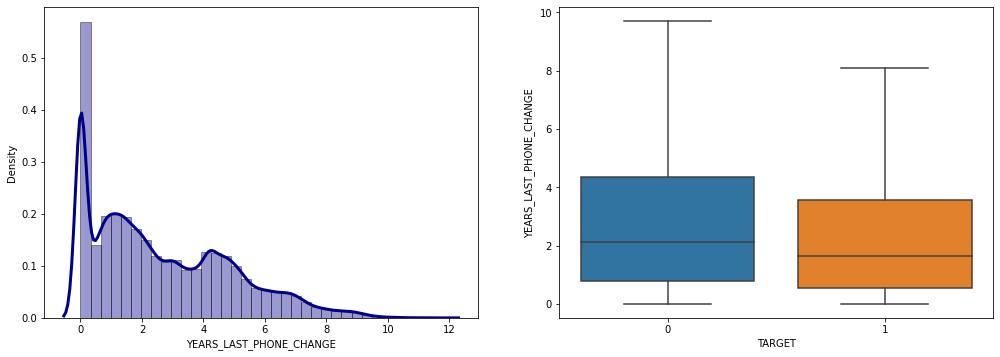

In [40]:
plot_numerical(curr_app,'YEARS_LAST_PHONE_CHANGE','TARGET')

The plot on the left shows the distribution of "YEARS_EMPLOYED".
From the box plots on the right we see that risky customers have slightly smaller durations of current employment.

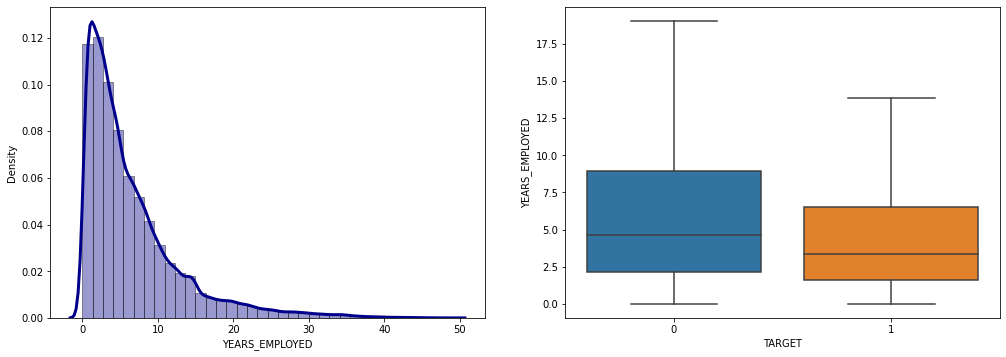

In [41]:
plot_numerical(curr_app,'YEARS_EMPLOYED','TARGET')

The plot on the left shows the distribution of "YEARS_REGISTRATION".
From the box plots on the right we see that risky customers have slightly lower values of "YEARS_REGISTRATION" compared to non risky customers.

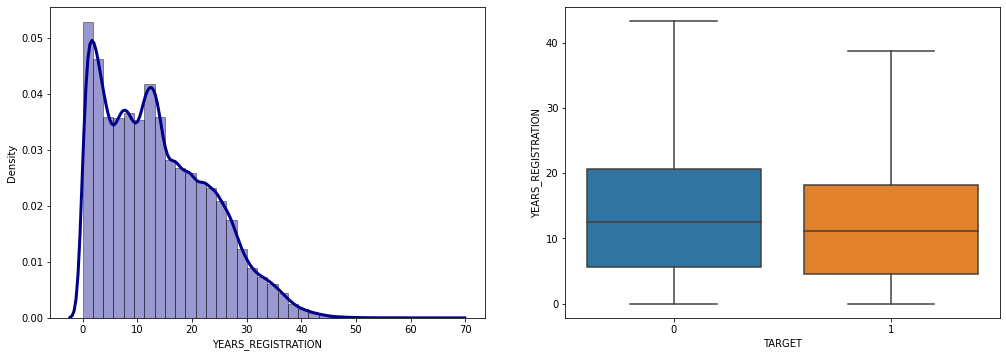

In [42]:
plot_numerical(curr_app,'YEARS_REGISTRATION','TARGET')

The plot on the left shows the distribution of "AMT_REQ_CREDIT_BUREAU_YEAR".
From the box plots on the right we see that the credit bureau received more requests inquiring about the risky customers in a year compared to non risky customers.

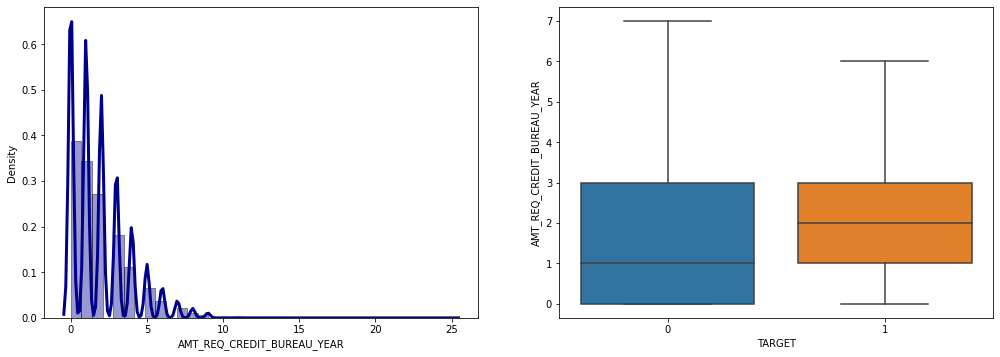

In [43]:
plot_numerical(curr_app,'AMT_REQ_CREDIT_BUREAU_YEAR','TARGET')

The plot on the left shows the distribution of "AMT_CREDIT".
From the box plots on the right we see that non risky customers have slightly higher amount of loan approval compared to risky customers.

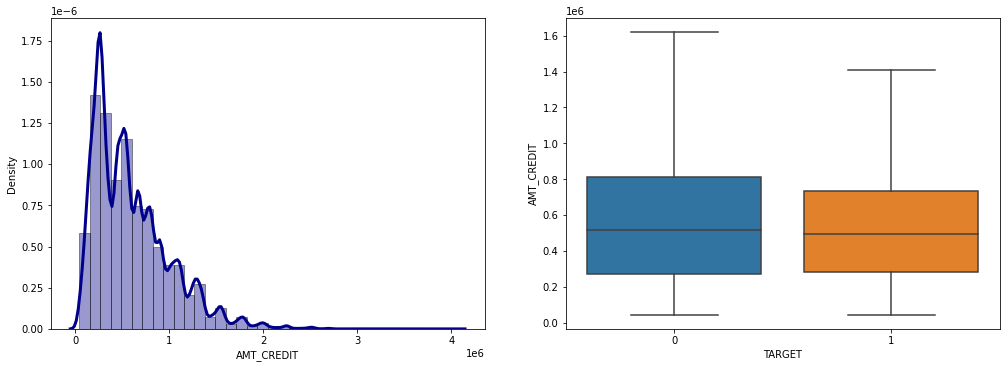

In [44]:
plot_numerical(curr_app,'AMT_CREDIT','TARGET')

The plot on the left shows the distribution of "AMT_ANNUITY".
From the box plots on the right we see that non risky customers have slightly higher EMI as their loan amount is higher than risky customers.

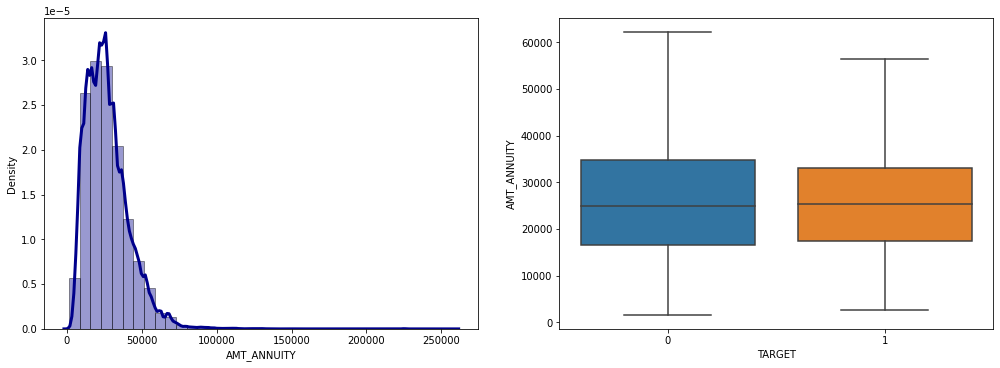

In [45]:
plot_numerical(curr_app,'AMT_ANNUITY','TARGET')

# Previous Application Info

Merging Current Application and Previous Application data sets.

In [46]:
merged_app = curr_app[['SK_ID_CURR',"TARGET"]].merge(previous_app,on = "SK_ID_CURR" , how = "left")

#Converting all columns with days to years (from previous application data sets)
merged_app[['YEARS_DECISION', 'YEARS_FIRST_DRAWING', 'YEARS_FIRST_DUE', 'YEARS_LAST_DUE_1ST_VERSION', 'YEARS_LAST_DUE', 'YEARS_TERMINATION']] = merged_app[['DAYS_DECISION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION']]/(-365)

#The days columns mostly had negative values except for a few positive values. When we divided by -365 these positive values got changed to negative with absurd -1000 year values.
#Replacing these negative values with nan.
cols = ['YEARS_DECISION', 'YEARS_FIRST_DRAWING', 'YEARS_FIRST_DUE', 'YEARS_LAST_DUE_1ST_VERSION', 'YEARS_LAST_DUE', 'YEARS_TERMINATION']
for col in cols:
  merged_app.loc[merged_app[col]<0,col] = np.nan

merged_app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430155 entries, 0 to 1430154
Data columns (total 44 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1430155 non-null  int64  
 1   TARGET                       1430155 non-null  int64  
 2   SK_ID_PREV                   1413701 non-null  float64
 3   NAME_CONTRACT_TYPE           1413701 non-null  object 
 4   AMT_ANNUITY                  1106483 non-null  float64
 5   AMT_APPLICATION              1413701 non-null  float64
 6   AMT_CREDIT                   1413700 non-null  float64
 7   AMT_DOWN_PAYMENT             664161 non-null   float64
 8   AMT_GOODS_PRICE              1094176 non-null  float64
 9   WEEKDAY_APPR_PROCESS_START   1413701 non-null  object 
 10  HOUR_APPR_PROCESS_START      1413701 non-null  float64
 11  FLAG_LAST_APPL_PER_CONTRACT  1413701 non-null  object 
 12  NFLAG_LAST_APPL_IN_DAY       1413701 non-n

The pie chart on the left shows the distribution of the "NAME_CONTRACT_STATUS" variable.
The bar graph on the right shows the proportion of risk of each segment of the "NAME_CONTRACT_STATUS" variable. We see that clients with higher proprtions of previous applications 'rejected' are riskier.

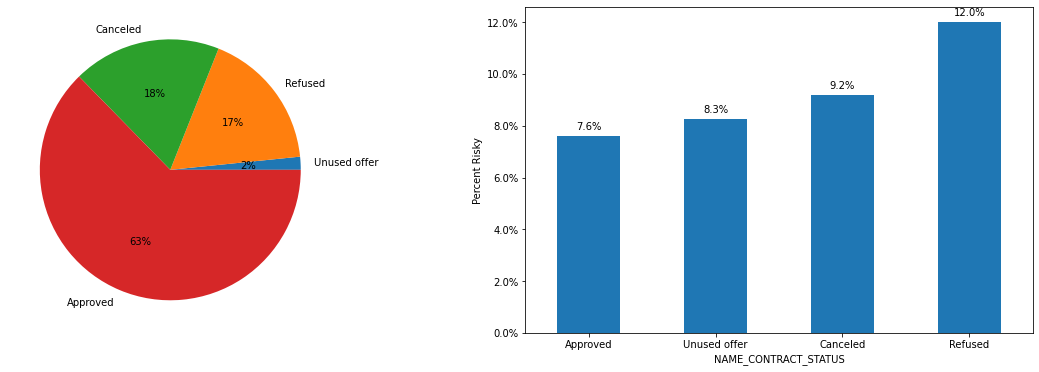

In [47]:
plot_categorical(merged_app,"NAME_CONTRACT_STATUS","TARGET",label_rotation=0,combine_less_freq_segments=False)

The chart on the left shows the distribution of "YEARS_DECISION".
From the box plots on the right we see that the decision date of the previous application is further back in the past of "Approved" or "Unused" offer compared to "Cancelled" or "Refused".

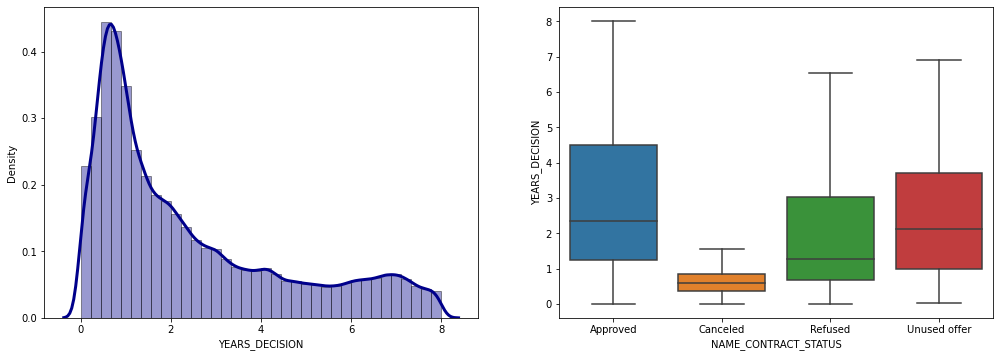

In [48]:
plot_numerical(merged_app,"YEARS_DECISION","NAME_CONTRACT_STATUS")

The chart on the left shows the distribution of "AMT_GOODS_PRICE".
From the box plots on the right we see that the prices of the goods that the clients asked loans in the previous application is higher in "Canceled" or "Refused" compared to "Approved" or "Unused offer"

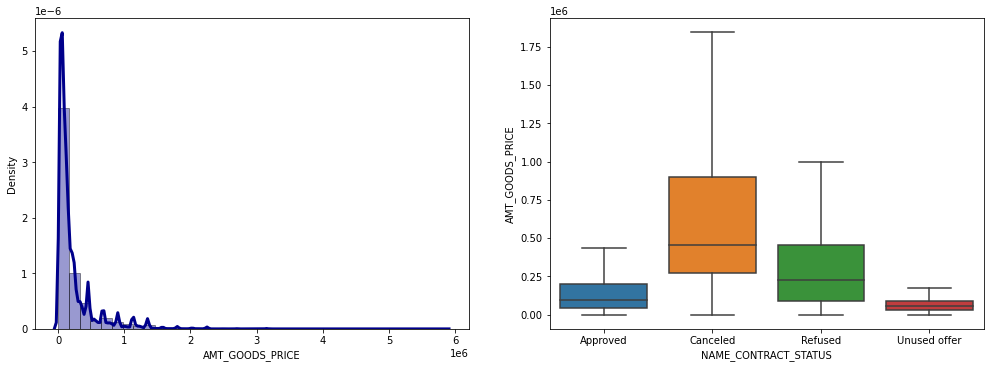

In [49]:
plot_numerical(merged_app,"AMT_GOODS_PRICE","NAME_CONTRACT_STATUS")

The chart on the left shows the distribution of "CNT_PAYMENT".
From the box plots on the right we see that "CNT_PAYMENT" is higher in "Canceled" or "Refused" compared to "Approved" or "Unused offer".

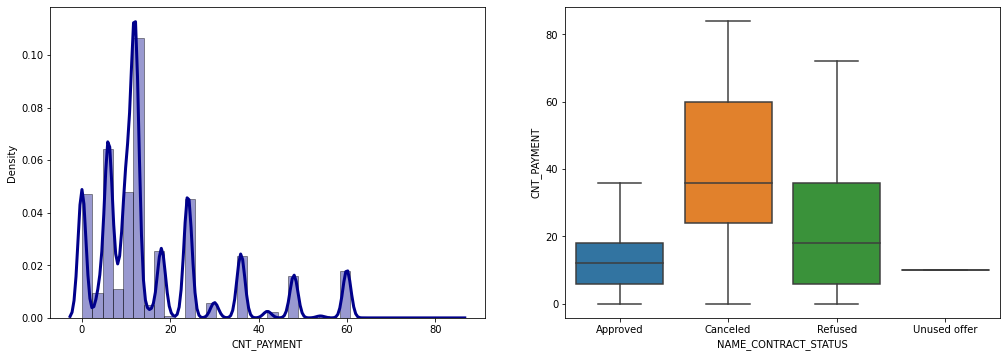

In [50]:
plot_numerical(merged_app,"CNT_PAYMENT","NAME_CONTRACT_STATUS")

The chart on the left shows the distribution of "AMT_ANNUITY".
From the box plots on the right we see that "AMT_ANNUITY" is slightly higher in "Canceled" or "Refused" compared to "Approved" or "Unused offer".

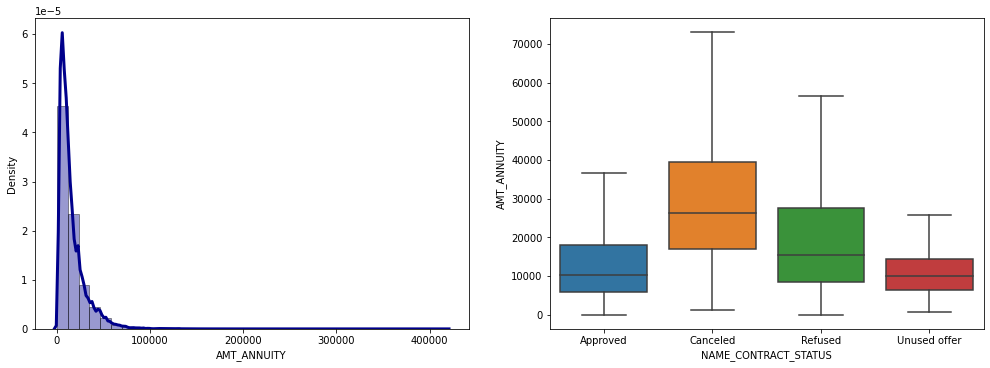

In [51]:
plot_numerical(merged_app,"AMT_ANNUITY","NAME_CONTRACT_STATUS")

The chart on the left shows the distribution of "RATE_DOWN_PAYMENT".
From the box plots on the right we see that "RATE_DOWN_PAYMENT" is slightly higher in "Approved" and "Unused offer" compared to  "Canceled" and "Refused".

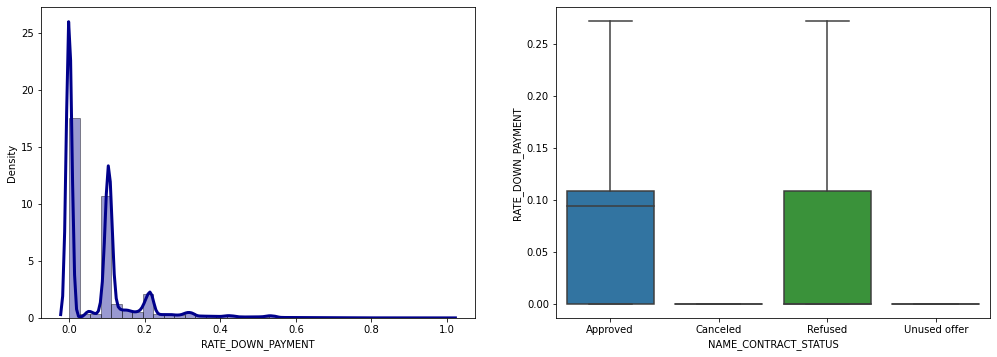

In [52]:
plot_numerical(merged_app,"RATE_DOWN_PAYMENT","NAME_CONTRACT_STATUS")

The chart on the left shows the distribution of "HOUR_APPR_PROCESS_START".
From the box plots on the right it seems that the approval or refusal of the loan does not depend on the hour of the application.

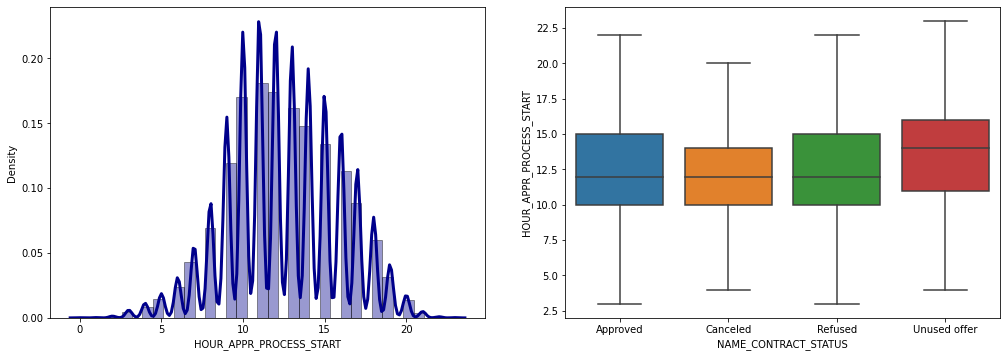

In [53]:
plot_numerical(merged_app,"HOUR_APPR_PROCESS_START","NAME_CONTRACT_STATUS")

The chart on the left shows the distribution of "YEARS_FIRST_DRAWING".
From the box ploys on the right we see that "YEARS_FIRST_DRAWING" is available only when the loan is approved.

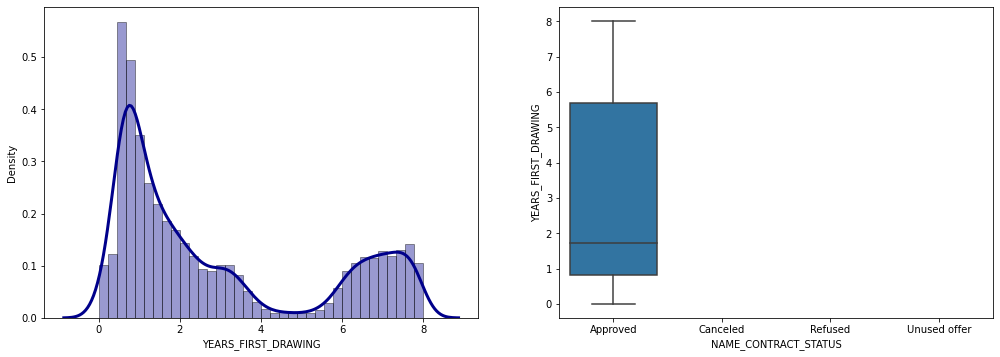

In [54]:
plot_numerical(merged_app,"YEARS_FIRST_DRAWING","NAME_CONTRACT_STATUS")

The chart on the left shows the distribution of "RATE_INTEREST_PRIVILEGED".
From the box ploys on the right we see that "RATE_INTEREST_PRIVILEGED" is available only when the loan is approved.

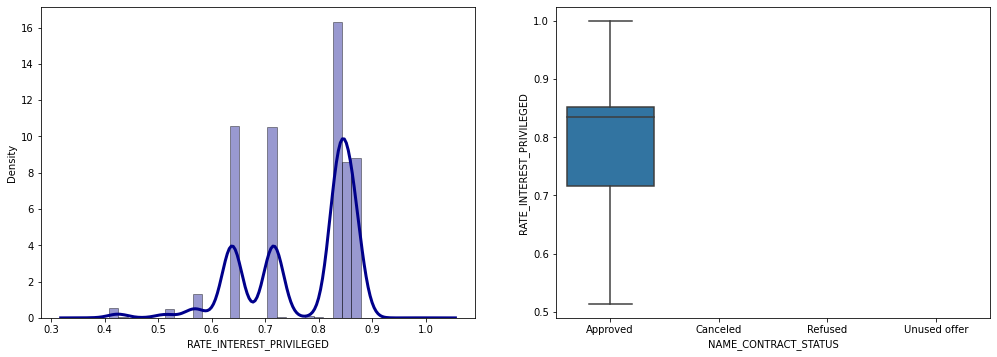

In [55]:
plot_numerical(merged_app,"RATE_INTEREST_PRIVILEGED","NAME_CONTRACT_STATUS")

The chart on the left shows the distribution of "YEARS_LAST_DUE_1ST_VERSION".
From the box ploys on the right we see that "YEARS_LAST_DUE_1ST_VERSION" is available only when the loan is approved.

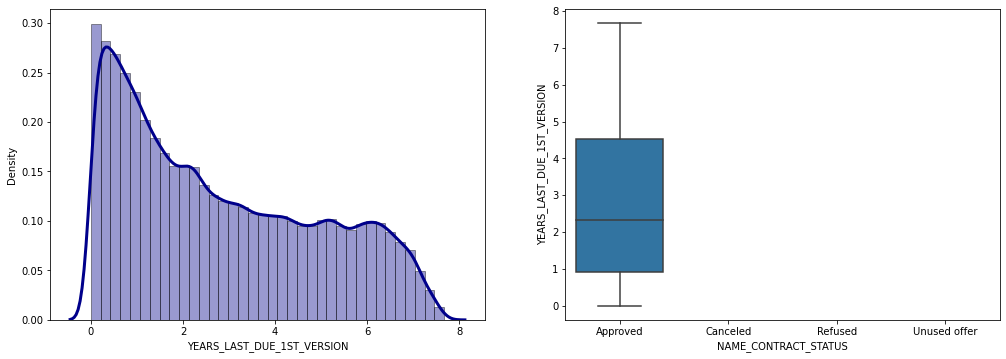

In [56]:
plot_numerical(merged_app,"YEARS_LAST_DUE_1ST_VERSION","NAME_CONTRACT_STATUS")

The chart on the left shows the distribution of "AMT_DOWN_PAYMENT".
From the box ploys on the right we see that those who promised to pay higher down payments have higher approval rates.

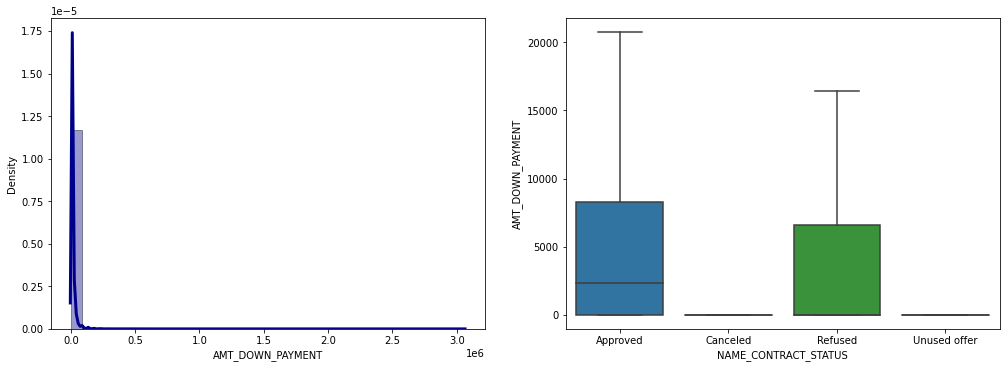

In [57]:
plot_numerical(merged_app,"AMT_DOWN_PAYMENT","NAME_CONTRACT_STATUS")

The pie chart on the left shows the distribution of "CHANNEL_TYPE"
Out of the two largest segments ("Credit and cash offices" and "Country-wide") "Country-wide" has higher approval rate than "Credit and cash offices".

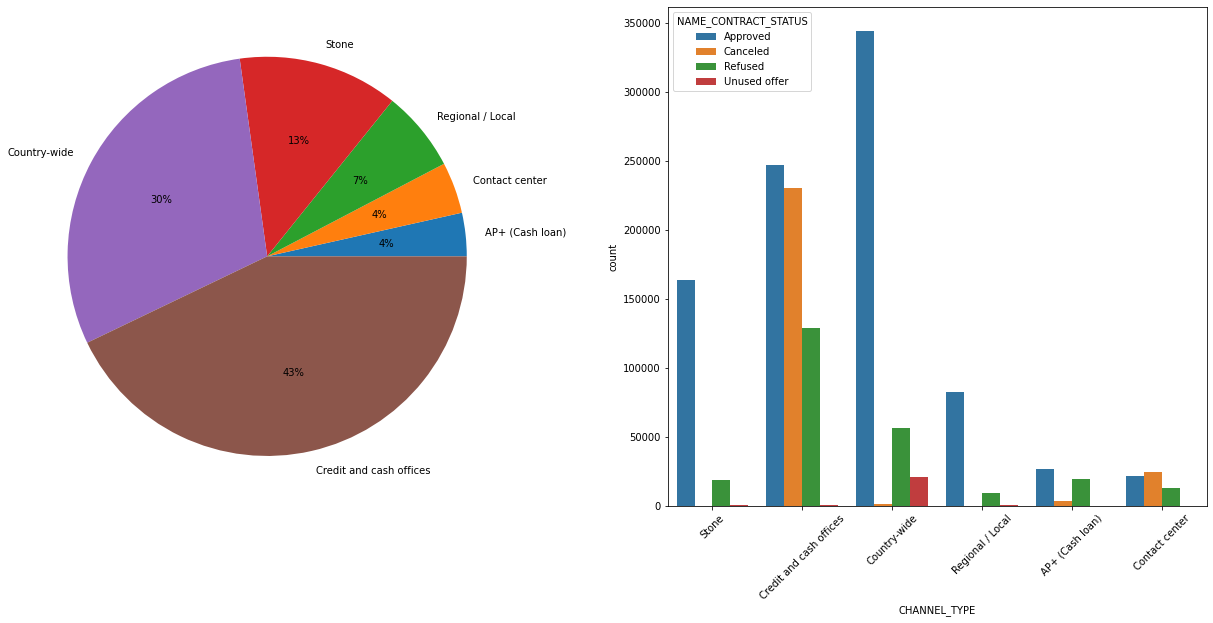

In [58]:
plot_categorical_count(merged_app,"CHANNEL_TYPE","NAME_CONTRACT_STATUS",combine_less_freq_segments = True)

The pie chart on the left shows the distribution of "NAME_PRODUCT_TYPE"
Out of the two largest segments ("XNA" and "x-sell") "x-sell" has higher approval rate than "XNA".

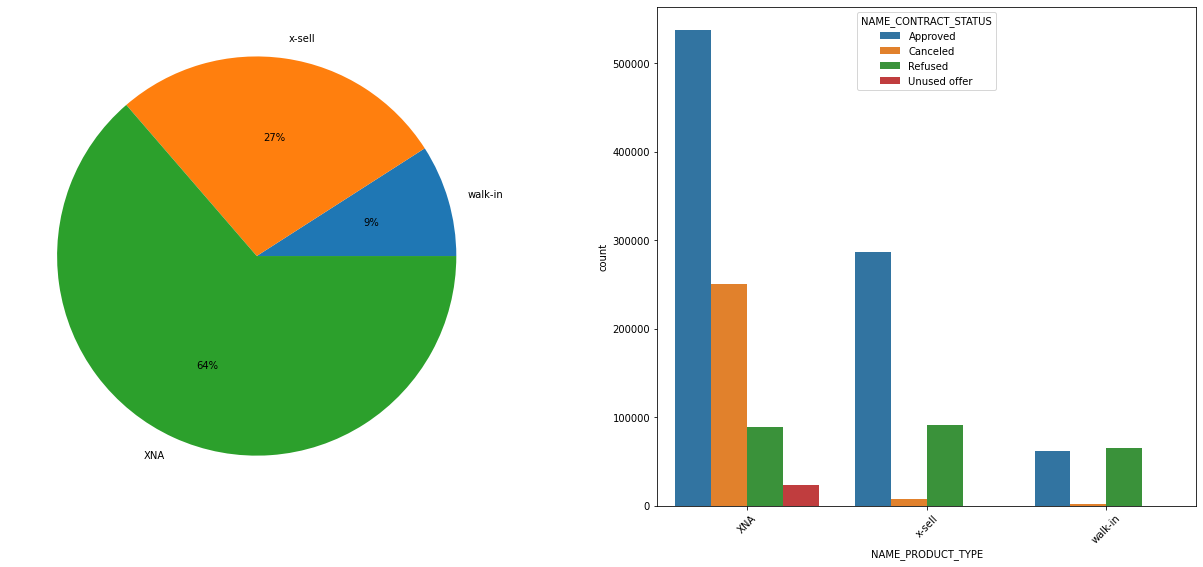

In [59]:
plot_categorical_count(merged_app,"NAME_PRODUCT_TYPE","NAME_CONTRACT_STATUS",combine_less_freq_segments = False)

The pie chart on the left shows the distribution of "PRODUCT_COMBINATION"
Out of the two largest segments ("Cash" and "POS household with interest") "POS household with interest" has significantly higher approval rate than "Cash".

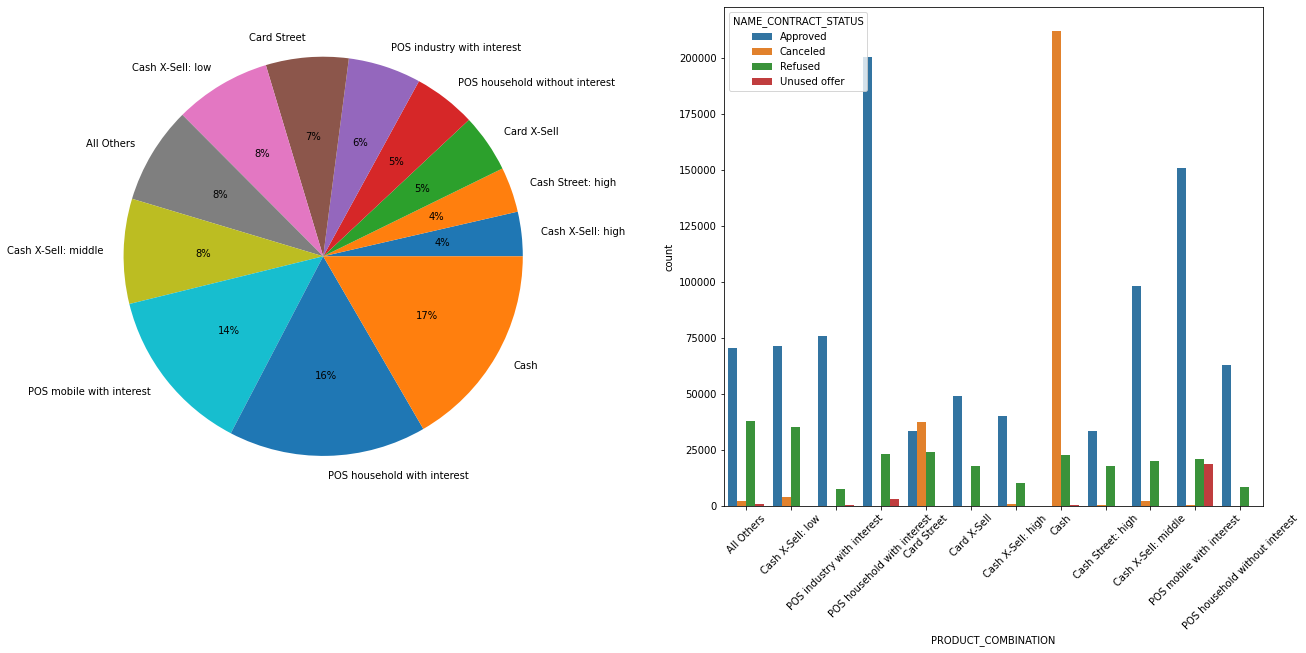

In [60]:
plot_categorical_count(merged_app,"PRODUCT_COMBINATION","NAME_CONTRACT_STATUS",combine_less_freq_segments = True)

The pie chart on the left shows the distribution of "NAME_CONTRACT_TYPE"
Out of the two largest segments ("Cash loans" and "Consumer loans") "Consumer loans" has higher approval rate than "Cash loans".

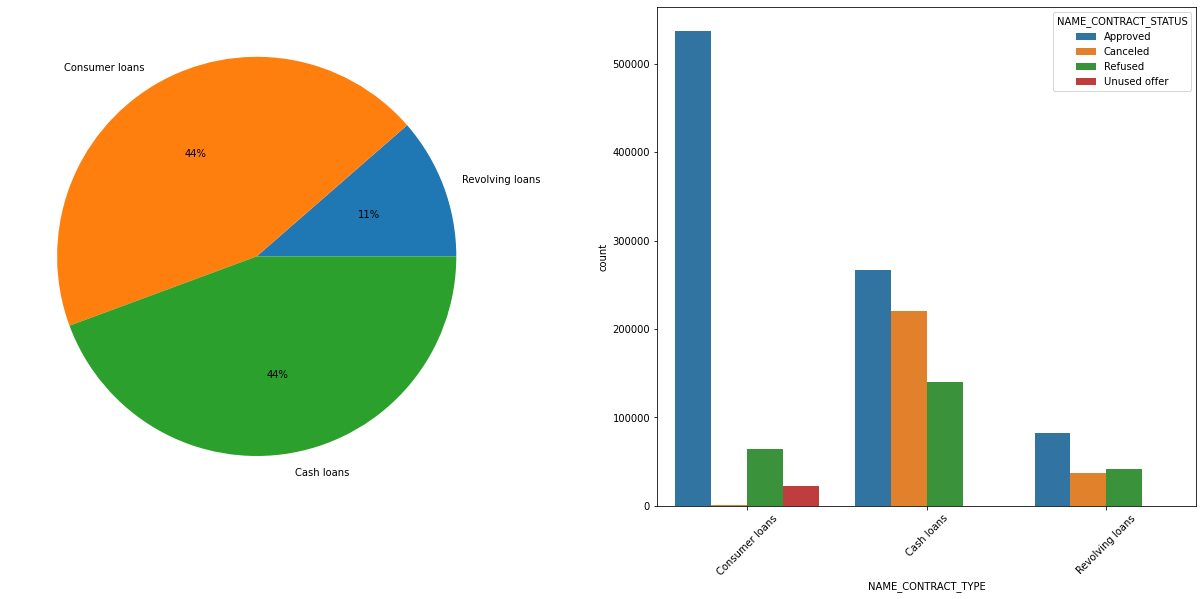

In [61]:
plot_categorical_count(merged_app,"NAME_CONTRACT_TYPE","NAME_CONTRACT_STATUS",combine_less_freq_segments = True)

The pie chart on the left shows the distribution of "NAME_GOODS_CATEGORY"
Out of the two largest segments ("XNA" and "Mobile") "Mobile" has higher approval rate than "XNA".

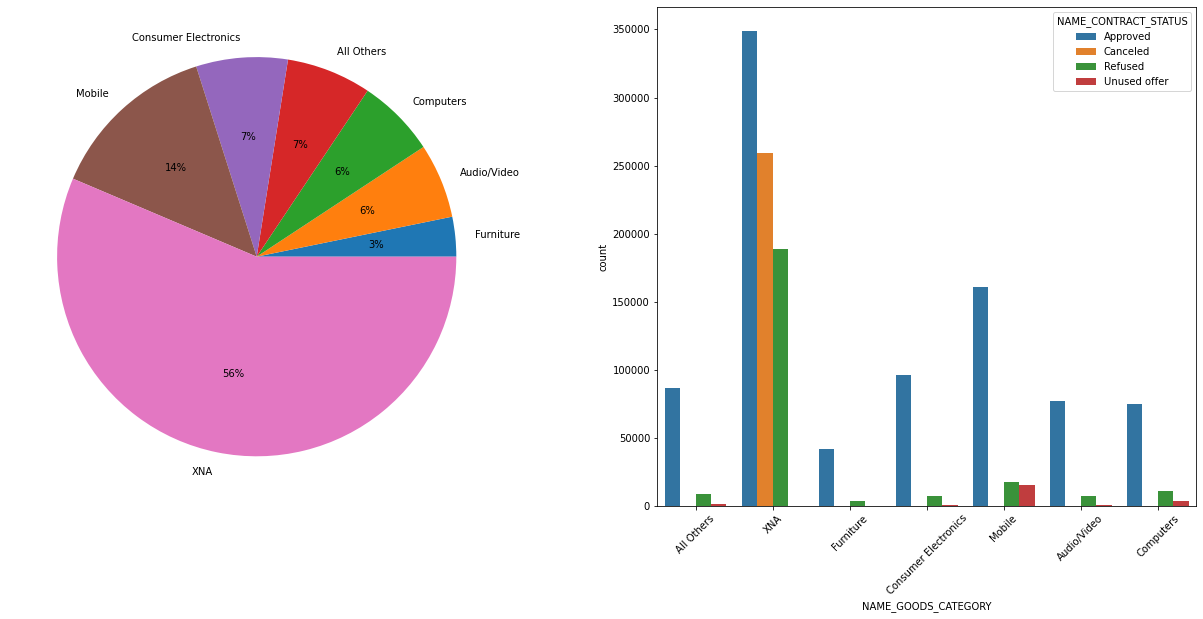

In [62]:
plot_categorical_count(merged_app,"NAME_GOODS_CATEGORY","NAME_CONTRACT_STATUS",combine_less_freq_segments = True)

The pie chart on the left shows the distribution of "NAME_SELLER_INDUSTRY"
Out of the two largest segments ("XNA" and "Consumer electronics") "Consumer electronics" has higher approval rate than "XNA".

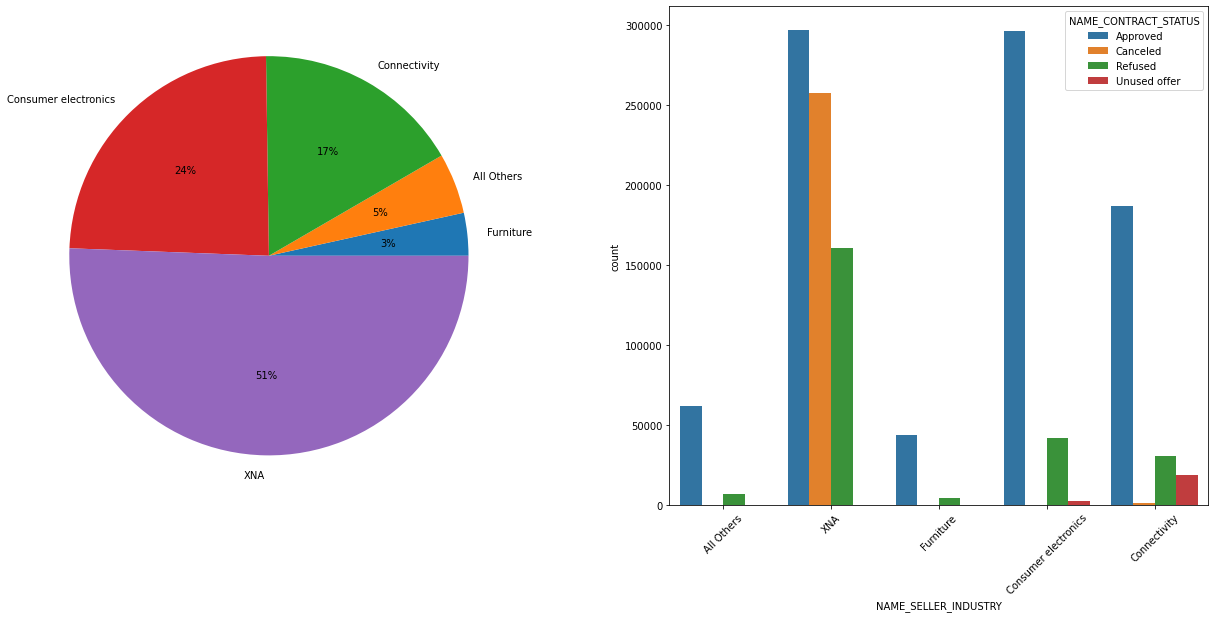

In [63]:
plot_categorical_count(merged_app,"NAME_SELLER_INDUSTRY","NAME_CONTRACT_STATUS",combine_less_freq_segments = True)

The pie chart on the left shows the distribution of "NAME_YIELD_GROUP"
Out of the two largest segments ("XNA" and "middle") "middle" has higher approval rate than "XNA".

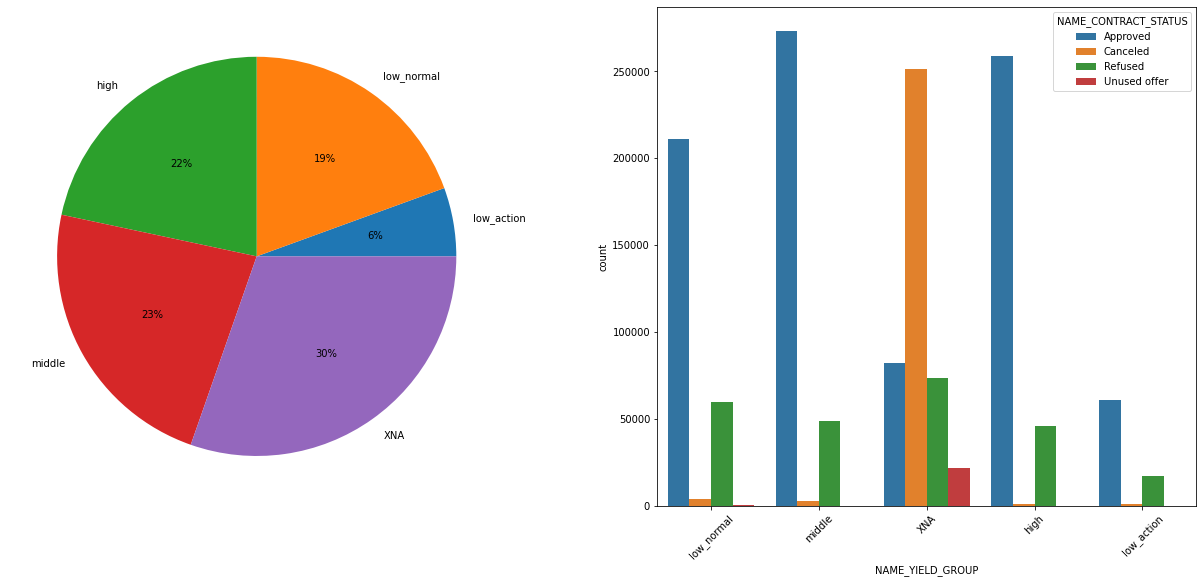

In [64]:
plot_categorical_count(merged_app,"NAME_YIELD_GROUP","NAME_CONTRACT_STATUS",combine_less_freq_segments = False)

The pie chart on the left shows the distribution of "NAME_TYPE_SUITE"
Out of the two largest segments ("Unaccompanied" and "Family") "Family" has higher approval rate than "Unaccompanied".

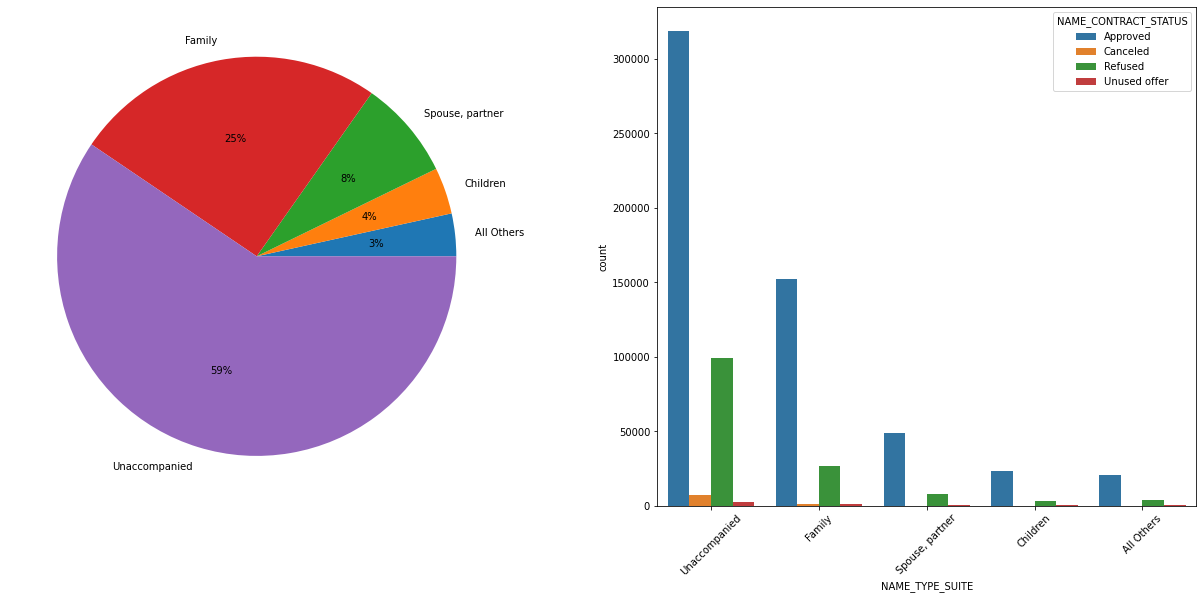

In [65]:
plot_categorical_count(merged_app,"NAME_TYPE_SUITE","NAME_CONTRACT_STATUS",combine_less_freq_segments = True)

The pie chart on the left shows the distribution of "NAME_PORTFOLIO"
Out of the two largest segments ("POS" and "Cash") "POS" has higher approval rate than "Cash".

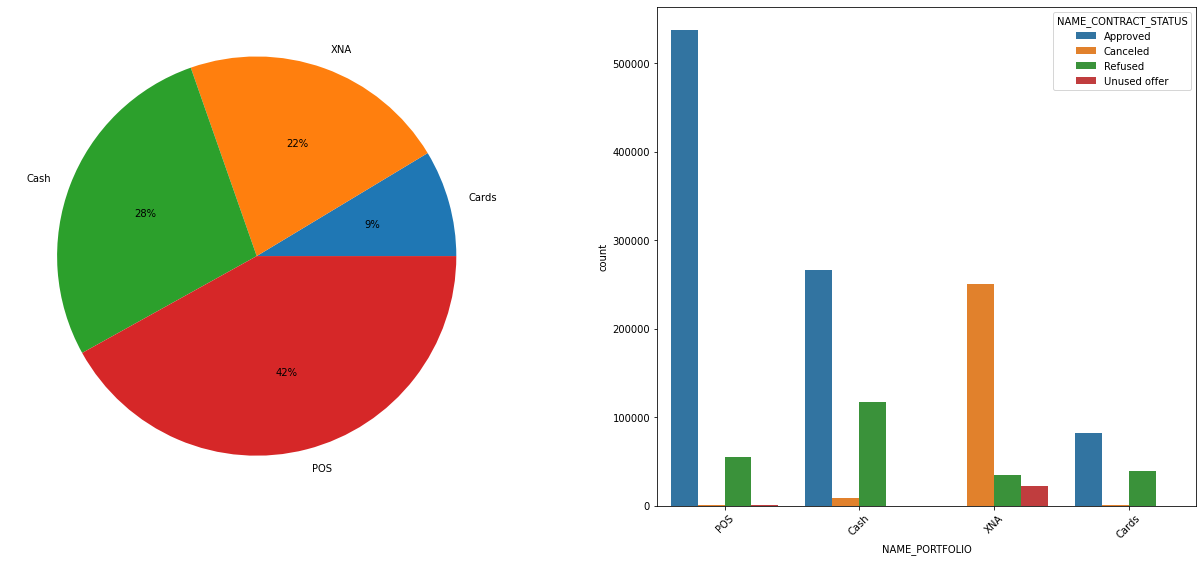

In [66]:
plot_categorical_count(merged_app,"NAME_PORTFOLIO","NAME_CONTRACT_STATUS",combine_less_freq_segments = True)

The pie chart on the left shows the distribution of "NAME_PAYMENT_TYPE"
Out of the two largest segments ("Cash through the bank" and "XNA") "Cash through the bank" has higher approval rate than "XNA".

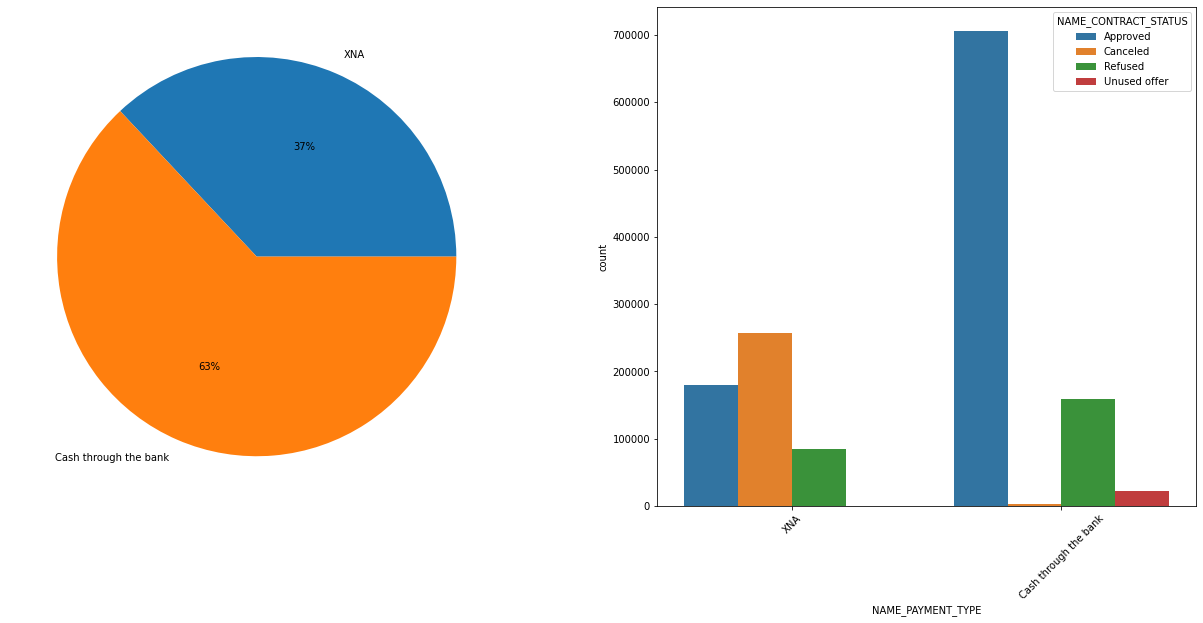

In [67]:
plot_categorical_count(merged_app,"NAME_PAYMENT_TYPE","NAME_CONTRACT_STATUS",combine_less_freq_segments = True)

The pie chart on the left shows the distribution of "NAME_CLIENT_TYPE"
Out of the two largest segments ("Repeater" and "New") "New" has higher approval rate than "Repeater".

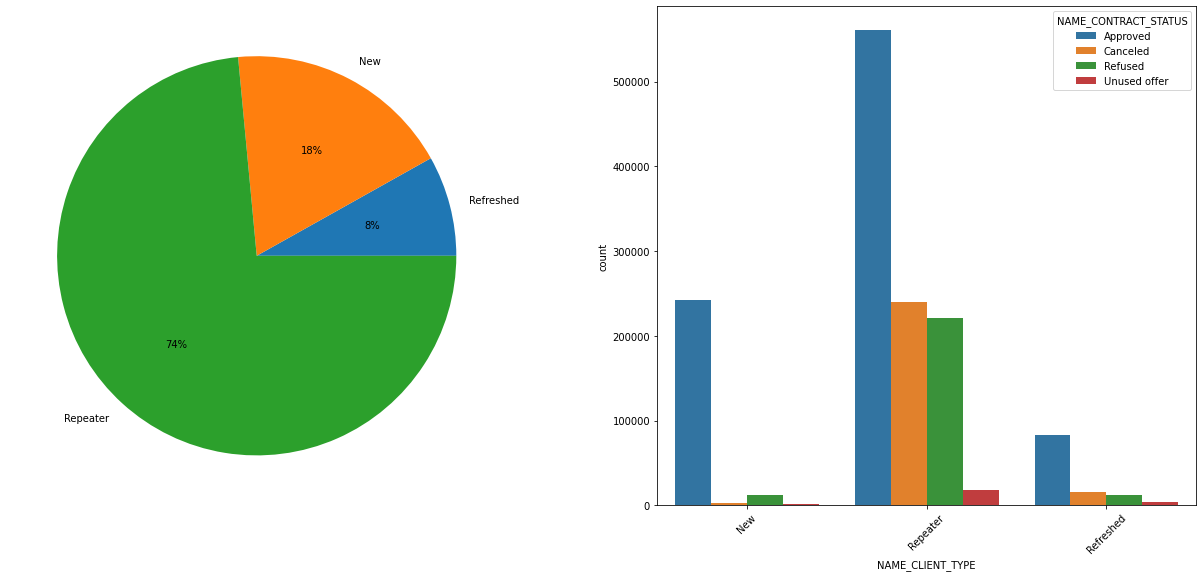

In [68]:
plot_categorical_count(merged_app,"NAME_CLIENT_TYPE","NAME_CONTRACT_STATUS",combine_less_freq_segments = True)

The pie chart on the left shows the distribution of "WEEKDAY_APPR_PROCESS_START"
Refusal rate is the least on a Sunday compared to the other days of the week.

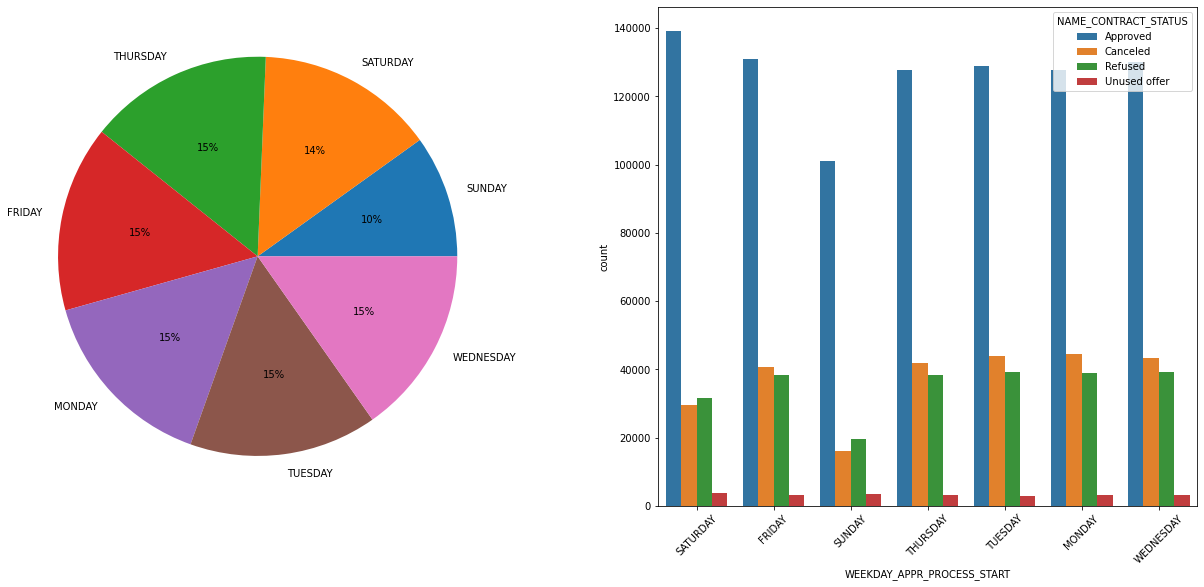

In [69]:
plot_categorical_count(merged_app,"WEEKDAY_APPR_PROCESS_START","NAME_CONTRACT_STATUS",combine_less_freq_segments = False)

Wherever we noticed "Refused" being disproportionately present in a group from the above charts, we have selected those variables as they seem to be the good identifiers of refused applications.

In [70]:
merged_app2 = merged_app[['SK_ID_CURR','TARGET','NAME_CONTRACT_STATUS','NAME_PRODUCT_TYPE',
                          'NAME_GOODS_CATEGORY','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','NAME_PAYMENT_TYPE',
                          'AMT_ANNUITY','AMT_DOWN_PAYMENT','RATE_DOWN_PAYMENT','YEARS_DECISION']]

# From one of the charts above we saw that applicants were more likely to default when their previous applications were refused,hence "Refused" is set to 1.
merged_app2['PrevApp_Refused'] = merged_app2.NAME_CONTRACT_STATUS.map({'Refused':1}).fillna(0)

# From one of the charts above we saw that applicants were more likely to default when their type of product says "walk-in",hence "walk-in" is set to 1.
merged_app2['PRODUCT_TYPE_WALKIN'] = merged_app2.NAME_PRODUCT_TYPE.map({'walk-in':1}).fillna(0)

# From one of the charts above we saw that applicants were more likely to get refused when the data was not applicable(XNA), hence it is set to 1.
merged_app2['GOODS_CATEGORY_XNA'] = merged_app2.NAME_GOODS_CATEGORY.map({'XNA':1}).fillna(0)
merged_app2['SELLER_INDUSTRY_XNA'] = merged_app2.NAME_SELLER_INDUSTRY.map({'XNA':1}).fillna(0)
merged_app2['YIELD_GROUP_XNA'] = merged_app2.NAME_YIELD_GROUP.map({'XNA':1}).fillna(0)
merged_app2['PAYMENT_TYPE_XNA'] = merged_app2.NAME_PAYMENT_TYPE.map({'XNA':1}).fillna(0)

# We observed negative values in the following variables, hence we changed it to 0.
merged_app2.loc[merged_app2['AMT_DOWN_PAYMENT']<0,'AMT_DOWN_PAYMENT'] = 0
merged_app2.loc[merged_app2['RATE_DOWN_PAYMENT']<0,'RATE_DOWN_PAYMENT'] = 0

merged_app2.describe()

,SK_ID_CURR,TARGET,AMT_ANNUITY,AMT_DOWN_PAYMENT,RATE_DOWN_PAYMENT,YEARS_DECISION,PrevApp_Refused,PRODUCT_TYPE_WALKIN,GOODS_CATEGORY_XNA,SELLER_INDUSTRY_XNA,YIELD_GROUP_XNA,PAYMENT_TYPE_XNA
count,1430155.0000,1430155.0000,1106483.0000,664161.0000,664161.0000,1413701.0000,1430155.0000,1430155.0000,1430155.0000,1430155.0000,1430155.0000,1430155.0000
mean,278470.2479,0.0862,15837.1850,6655.3172,0.0802,2.4120,0.1716,0.0897,0.5574,0.5002,0.3001,0.3657
std,102802.0953,0.2807,14724.9069,20620.3004,0.1078,2.1467,0.3770,0.2857,0.4967,0.5000,0.4583,0.4816
min,100002.0000,0.0000,0.0000,0.0000,0.0000,0.0027,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,189361.0000,0.0000,6257.8575,0.0000,0.0000,0.7425,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,278956.0000,0.0000,11223.7650,1791.0000,0.0625,1.5945,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000
75%,367509.0000,0.0000,20420.7750,7695.0000,0.1089,3.5973,0.0000,0.0000,1.0000,1.0000,1.0000,1.0000
max,456255.0000,1.0000,418058.1450,3060045.0000,1.0000,8.0055,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [71]:
# Grouping everything to the current application level (using mean) for the bivariate analysis with the target variables.
merged_app3 = merged_app2.groupby('SK_ID_CURR').mean()

merged_app3.columns = ['TARGET', 'AVG_AMT_ANNUITY', 'AVG_AMT_DOWN_PAYMENT', 'AVG_RATE_DOWN_PAYMENT',
      'AVG_YEARS_DECISION', 'Pct_PrevApp_Refused','PCT_PRODUCT_TYPE_WALKIN', 'PCT_GOODS_CATEGORY_XNA', 'PCT_SELLER_INDUSTRY_XNA','PCT_YIELD_GROUP_XNA','PCT_PAYMENT_TYPE_XNA']

merged_app3.describe()

,TARGET,AVG_AMT_ANNUITY,AVG_AMT_DOWN_PAYMENT,AVG_RATE_DOWN_PAYMENT,AVG_YEARS_DECISION,Pct_PrevApp_Refused,PCT_PRODUCT_TYPE_WALKIN,PCT_GOODS_CATEGORY_XNA,PCT_SELLER_INDUSTRY_XNA,PCT_YIELD_GROUP_XNA,PCT_PAYMENT_TYPE_XNA
count,307511.0000,290640.0000,273605.0000,273605.0000,291057.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000
mean,0.0807,14532.0528,7080.5033,0.0819,2.5194,0.1050,0.0762,0.3978,0.3466,0.2165,0.2950
std,0.2724,10007.4835,18421.7984,0.0895,1.5829,0.1811,0.1794,0.3544,0.3475,0.2426,0.2989
min,0.0000,0.0000,0.0000,0.0000,0.0055,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.0000,7835.9672,0.0000,0.0000,1.2789,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,0.0000,11984.3550,3375.0000,0.0663,2.1616,0.0000,0.0000,0.4000,0.3333,0.1667,0.2500
75%,0.0000,18330.3135,8282.2500,0.1089,3.4164,0.1765,0.0000,0.7000,0.6667,0.4000,0.5000
max,1.0000,300425.4450,2025000.0000,0.9897,8.0055,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Applicants with higher proportion of past refusals are riskier.

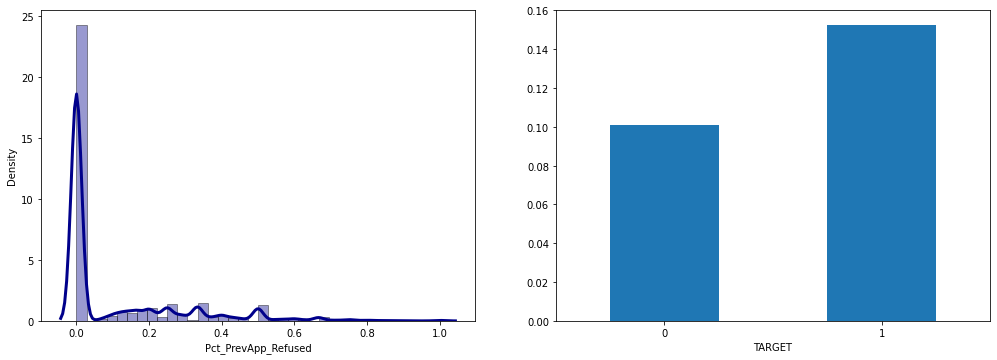

In [72]:
plot_numerical_avg(merged_app3,"Pct_PrevApp_Refused","TARGET")

Applicants with higher proportion of past walk-in applications are riskier.

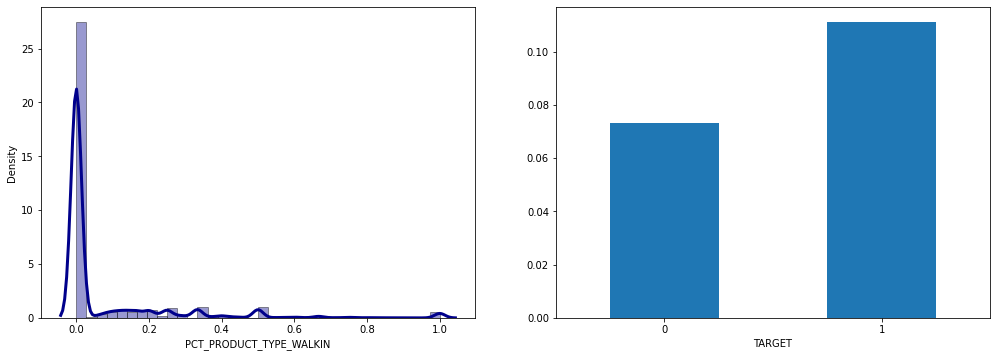

In [73]:
plot_numerical_avg(merged_app3,"PCT_PRODUCT_TYPE_WALKIN","TARGET")

Applicants with lower down payments on their previous applications are riskier.

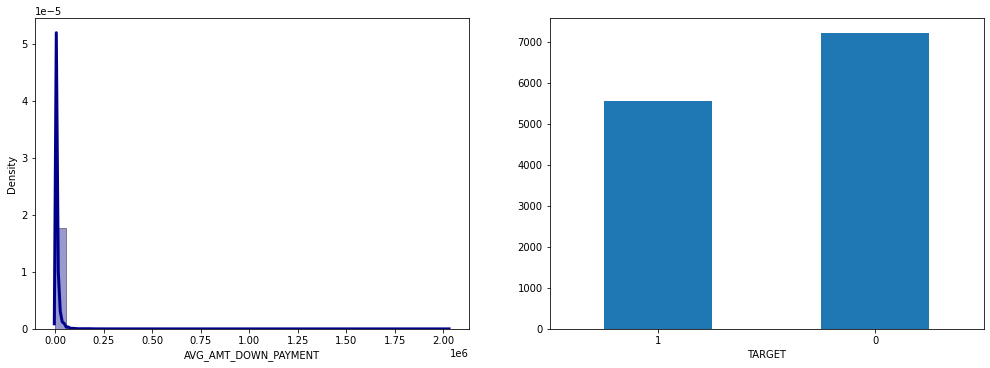

In [74]:
plot_numerical_avg(merged_app3,"AVG_AMT_DOWN_PAYMENT","TARGET")

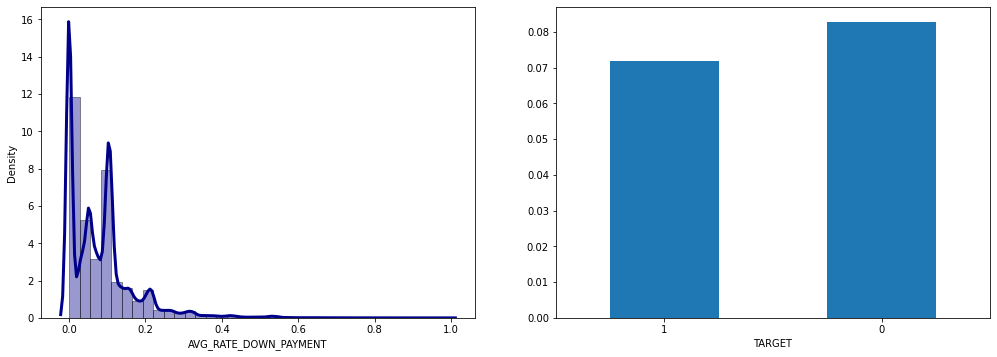

In [75]:
plot_numerical_avg(merged_app3,"AVG_RATE_DOWN_PAYMENT","TARGET")

Applicants with higher proportion of interest rate unavailable in their previous applications are riskier.

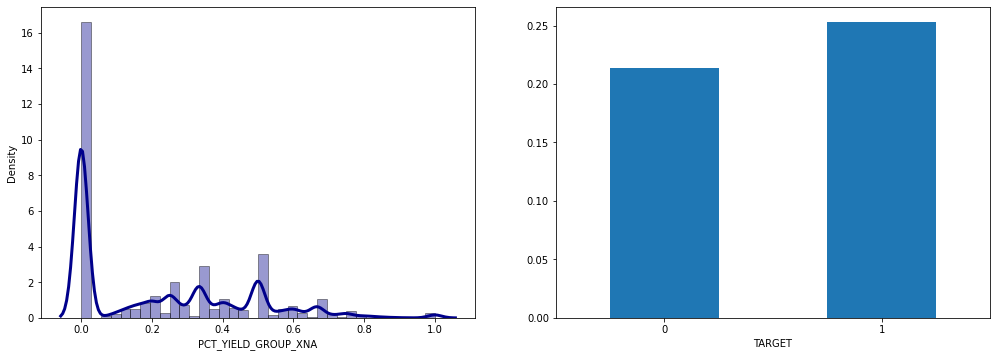

In [76]:
plot_numerical_avg(merged_app3,"PCT_YIELD_GROUP_XNA","TARGET")

Applicants with higher proportion of payment type unavailable in their previous applications are riskier.

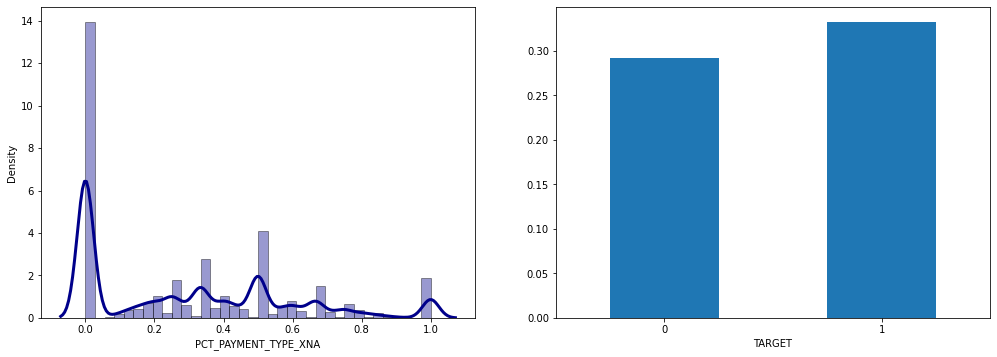

In [77]:
plot_numerical_avg(merged_app3,"PCT_PAYMENT_TYPE_XNA","TARGET")

Applicants with more recent previous applications are riskier.

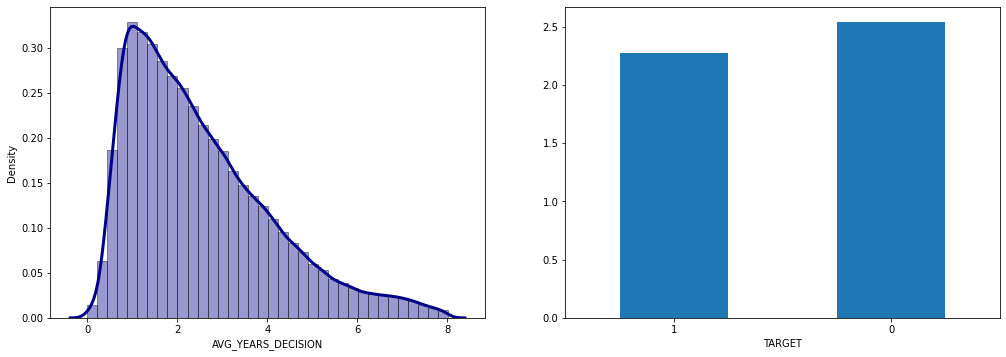

In [78]:
plot_numerical_avg(merged_app3,"AVG_YEARS_DECISION","TARGET")

Applicants with higher proportion of seller's industry unavailable in their previous applications are riskier.

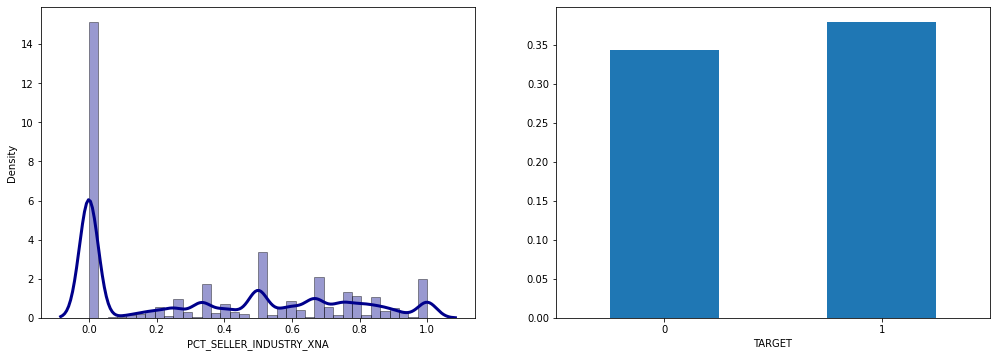

In [79]:
plot_numerical_avg(merged_app3,"PCT_SELLER_INDUSTRY_XNA","TARGET")

Applicants with higher proportion of goods category unavailable in their previous applications are riskier.

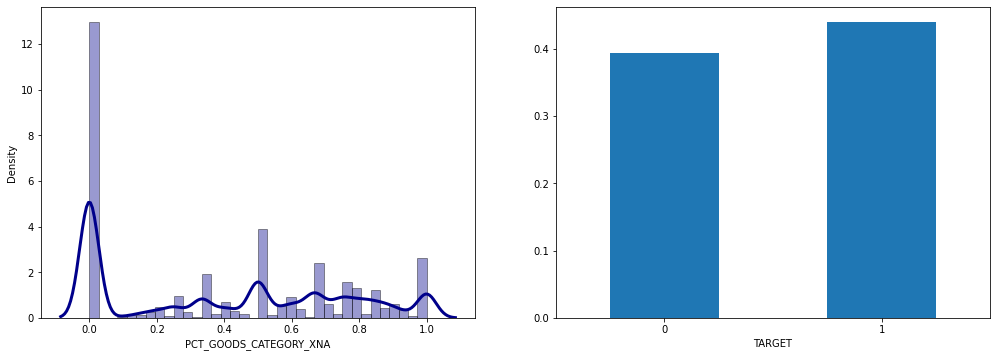

In [80]:
plot_numerical_avg(merged_app3,"PCT_GOODS_CATEGORY_XNA","TARGET")

# Fin!